In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('database_IND.csv')


In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<strong>Infotmation About Columns<br>
    
`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]<br>
`country_long` (text): longer form of the country designation<br>
`name` (text): name or title of the power plant, generally in Romanized form<br>
`gppd_idnr` (text): 10 or 12 character identifier for the power plant<br>
`capacity_mw` (number): electrical generating capacity in megawatts<br>
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)<br>
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)<br>
`primary_fuel` (text): energy source used in primary electricity generation or export<br>
`other_fuel1` (text): energy source used in electricity generation or export<br>
`other_fuel2` (text): energy source used in electricity generation or export<br>
`other_fuel3` (text): energy source used in electricity generation or export<br>
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available<br>
`owner` (text): majority shareholder of the power plant, generally in Romanized form<br>
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form<br>
`url` (text): web document corresponding to the `source` field<br>
`geolocation_source` (text): attribution for geolocation information<br>
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.<br>
`year_of_capacity_data` (number): year the capacity information was reported<br>
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013<br>
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014<br>
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015<br>
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016<br>
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017<br>
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018<br>
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019<br>
`generation_data_source` (text): attribution for the reported generation information<br>
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013<br>
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014<br>
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015<br>
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016<br>
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017<br>
`estimated_generation_note_2013` (text): label of the method used to estimate generation year 2013<br>
`estimated_generation_note_2014` (text): label of the method used to estimate generation year 2014<br>
`estimated_generation_note_2015` (text): label of the method used to estimate generation year 2015<br>
`estimated_generation_note_2016` (text): label of the method used to estimate generation year 2016<br>
`estimated_generation_note_2017` (text): label of the method used to estimate generation year 2017<br> 
</strong>

In [5]:
data.shape

(907, 27)

<strong>Dataset has total of 907 rows and many columns have null values in all of the rows, while sum have null values in more than 80% columns, so we can go ahead and delete this columns</strong>

In [6]:
data = data.drop(columns=[
    'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh'
])
data.shape

(907, 23)

In [7]:
data.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
other_fuel2               906
other_fuel3               907
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

<strong>Still there are lot of null values in the dataset , we will handle continuos variables later using imputation, and categorical variables will be hadnled using get_dummies of pandas</strong>

In [8]:
data.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
other_fuel2                 1
other_fuel3                 0
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

<strong>Some columns have only one unique value and some categorical columns have 907 values, which means they are identifiers, we can also drop the url column as it has no effect on the output</strong>

In [9]:
data = data.drop(columns=['country', 'country_long', 'name', 'gppd_idnr'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             198 non-null    object 
 5   other_fuel2             1 non-null      object 
 6   other_fuel3             0 non-null      float64
 7   commissioning_year      527 non-null    float64
 8   owner                   342 non-null    object 
 9   source                  907 non-null    object 
 10  url                     907 non-null    object 
 11  geolocation_source      888 non-null    object 
 12  year_of_capacity_data   519 non-null    float64
 13  generation_gwh_2014     398 non-null    float64
 14  generation_gwh_2015     422 non-null    fl

In [11]:
data = data.drop(columns=['other_fuel3'])

In [12]:
data.shape

(907, 18)

In [13]:
data = data.drop(columns=['url'])

<h3>Exploratory Data Analysis</h3>

In [14]:
cat_cols = ['primary_fuel', 'other_fuel1', 'other_fuel2','owner', 'source', 'geolocation_source', 'generation_data_source', 'year_of_capacity_data']
no_effective = ['source','owner', 'other_fuel2', 'generation_data_source']

In [15]:
num_cols = [col for col in data.columns if col not in cat_cols]
num_cols

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [16]:
convert_dict = {'year_of_capacity_data':'str'}
data = data.astype(convert_dict)

<h4>SccatterPlots</h4>

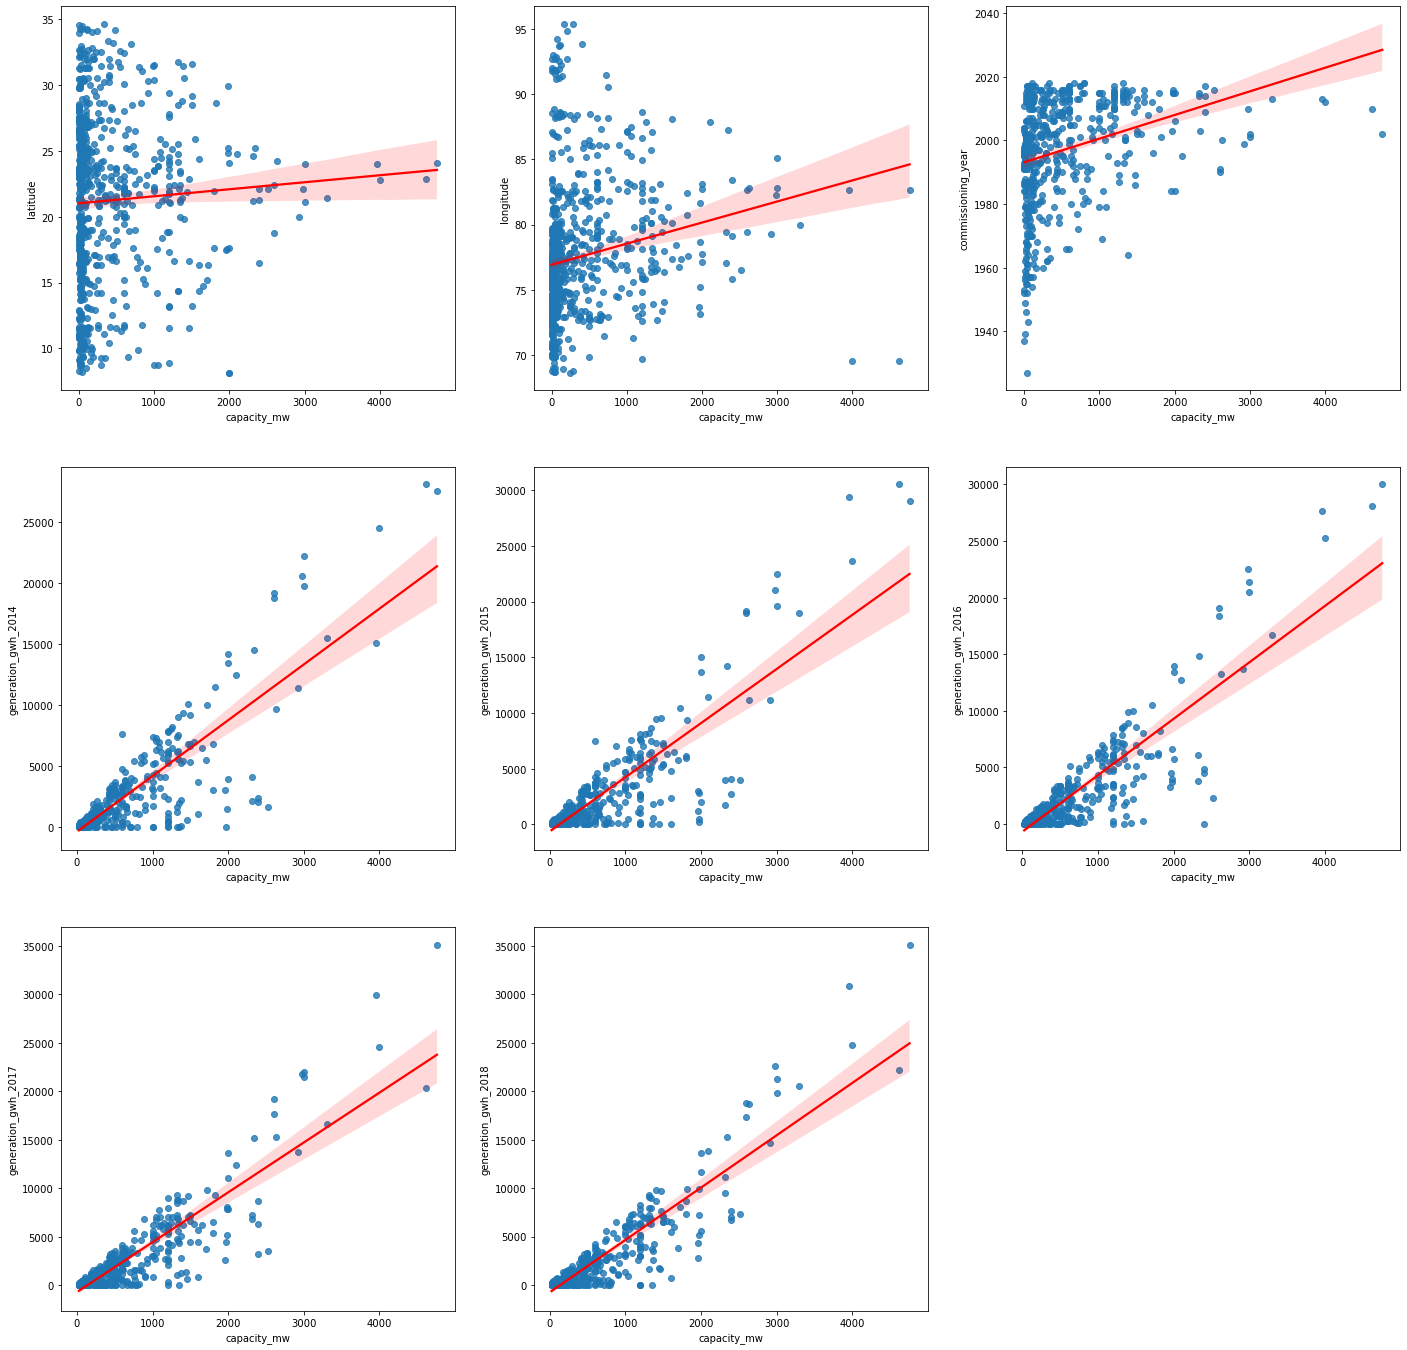

In [17]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    if col=='capacity_mw':
        continue
    plt.subplot(3,3, plotnumber)
    sns.regplot('capacity_mw', col, data=data, line_kws={'color':'red'})
    plotnumber+=1

<strong>
    <ul>
        <li>latitute has slight upwards trend with capacity</li>
        <li>longitude has slight upwards trend with capacity</li>
        <li>Comisiioning Year has upwards trend with capacity</li>
        <li>generation_2014 has upwards trend with capacity</li>
        <li>generation_2015 has upwards trend with capacity</li>
        <li>generation_2016 has upwards trend with capacity</li>
        <li>generation_2017 has upwards trend with capacity</li>
        <li>generation_2018 has upwards trend with capacity</li>
    </ul>
</strong>

<h4>Other Plots</h4>

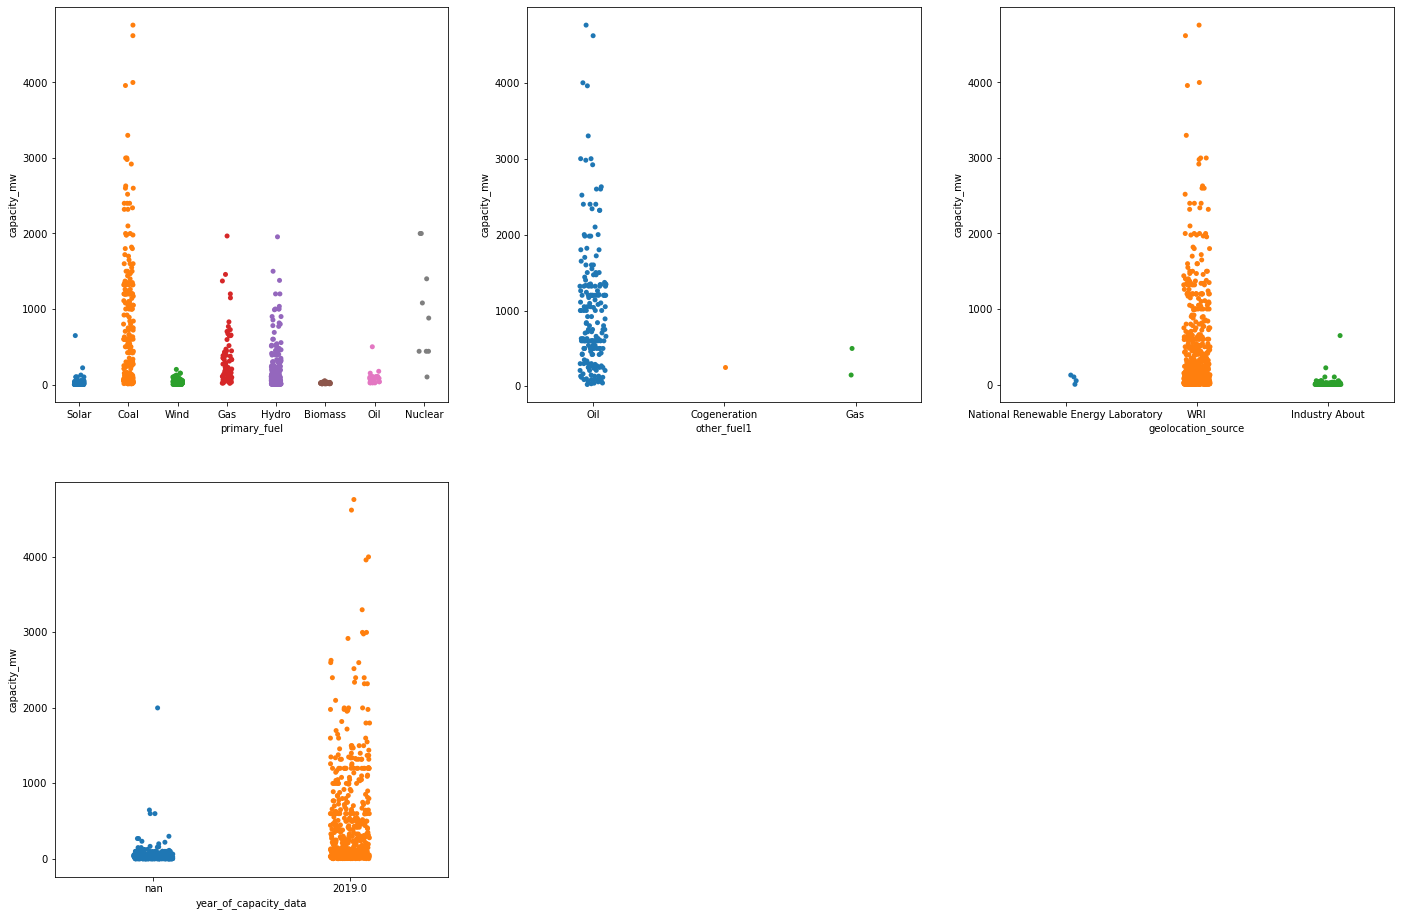

In [18]:
plt.figure(figsize=(24,16))
plotnumber=1
for col in cat_cols:
    if col in no_effective:
        continue
    
    plt.subplot(2,3,plotnumber)
    sns.stripplot(col, 'capacity_mw', data=data)
    plotnumber+=1

<strong>
    <ul>
        <li>Coal has higher capacity_mw, while gas, hydro and nulcear are low than coal but greater than Solar, wind, biomass and oil</li>
        <li>Oil has higher capacity_mw , while cogeneration and gas have low</li>
        <li>WRI has higher capacity_mw, while National Renewable Energy Laboratory and Industry About are lower</li>
        <li>2019 has higher capacity_mw, while nan has lower</li>
    </ul>
</strong>

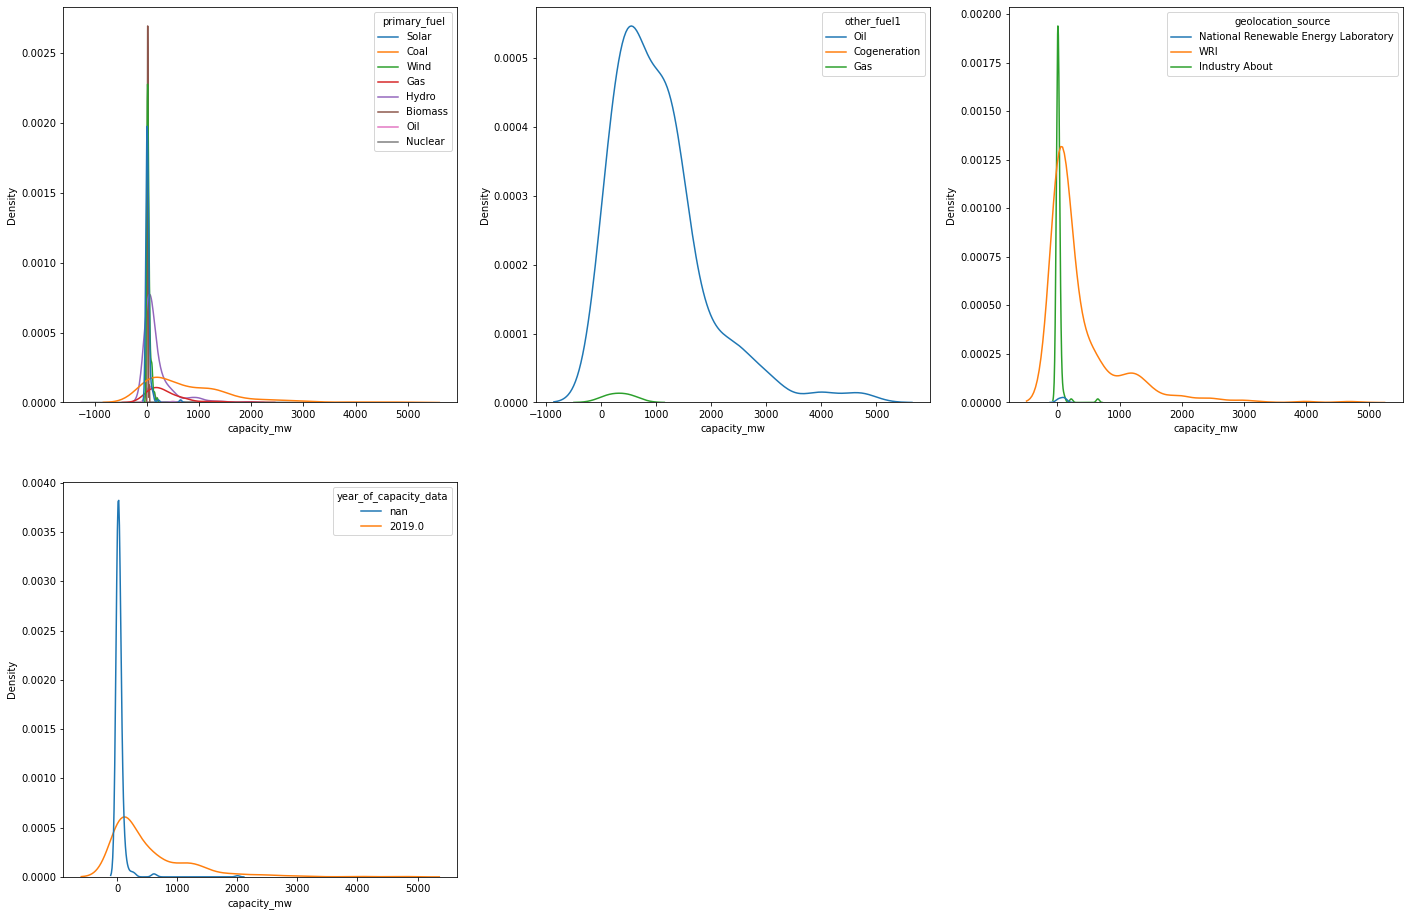

In [19]:
plt.figure(figsize=(24,16))
plotnumber=1
for col in cat_cols:
    if col in no_effective:
        continue
    
    plt.subplot(2,3,plotnumber)
    sns.kdeplot('capacity_mw',data=data, hue=col)
    plotnumber+=1

In [20]:
data['year_of_capacity_data'] = data['year_of_capacity_data'].replace('nan', np.nan)

<strong>Almost all vairbales have peaks around 0, while density varies as some features have higher instances</strong>

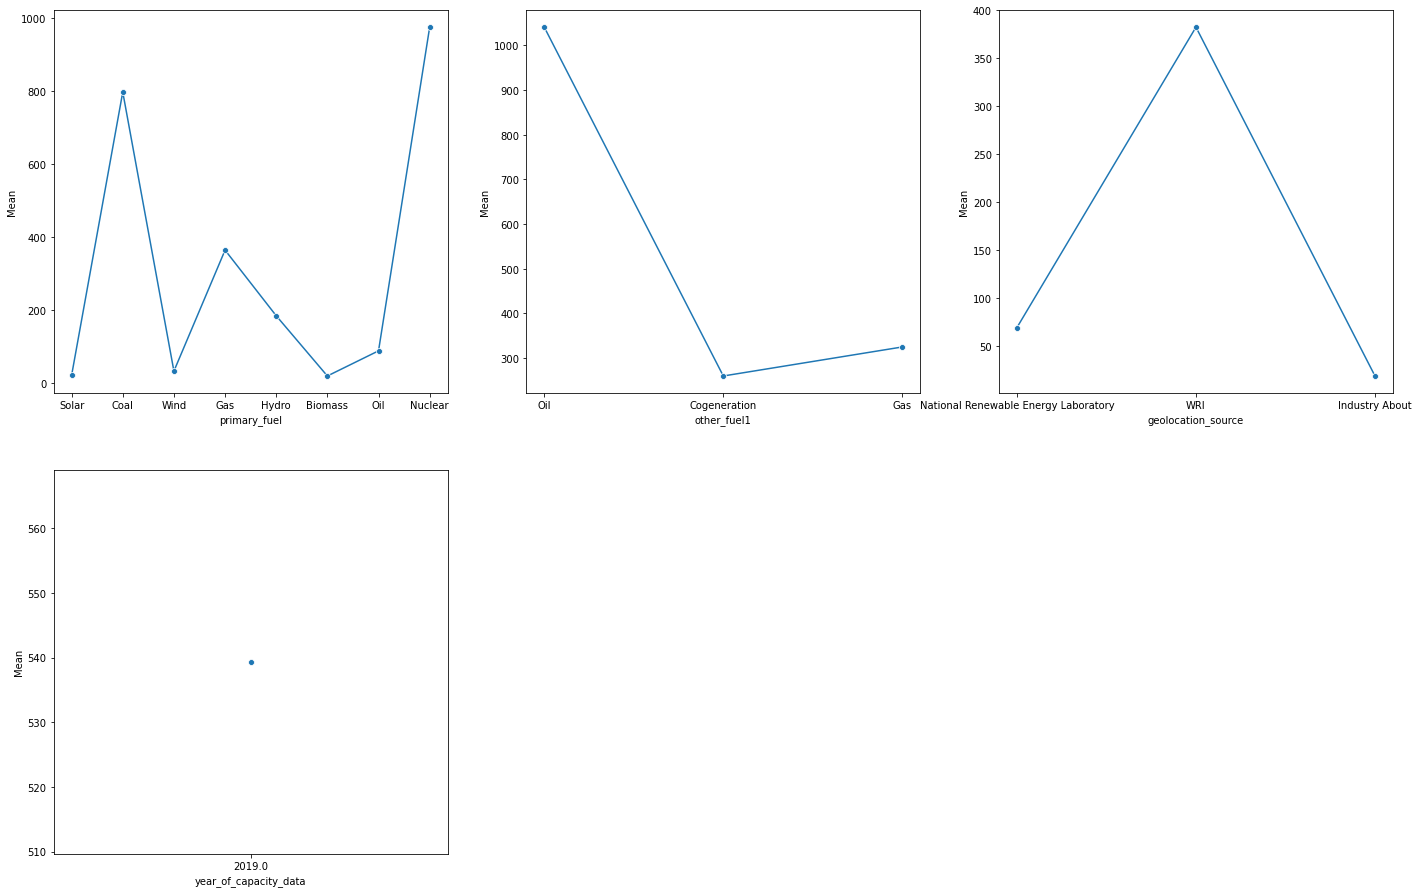

In [21]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in cat_cols:
    if col in no_effective:
        continue
    mean_vals = pd.DataFrame()
    unique_val = data[col].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data[col] == val]
        mean_val = mean_val['capacity_mw'].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(3,3, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

<strong>We can see here that nuclear has the highest mean values in primary_fuel followed by coal and gas<br>All other variables follow the same trend as seen in stripplots</strong>

<h4>Striplots of numerical variables for Classification Problem</h4>

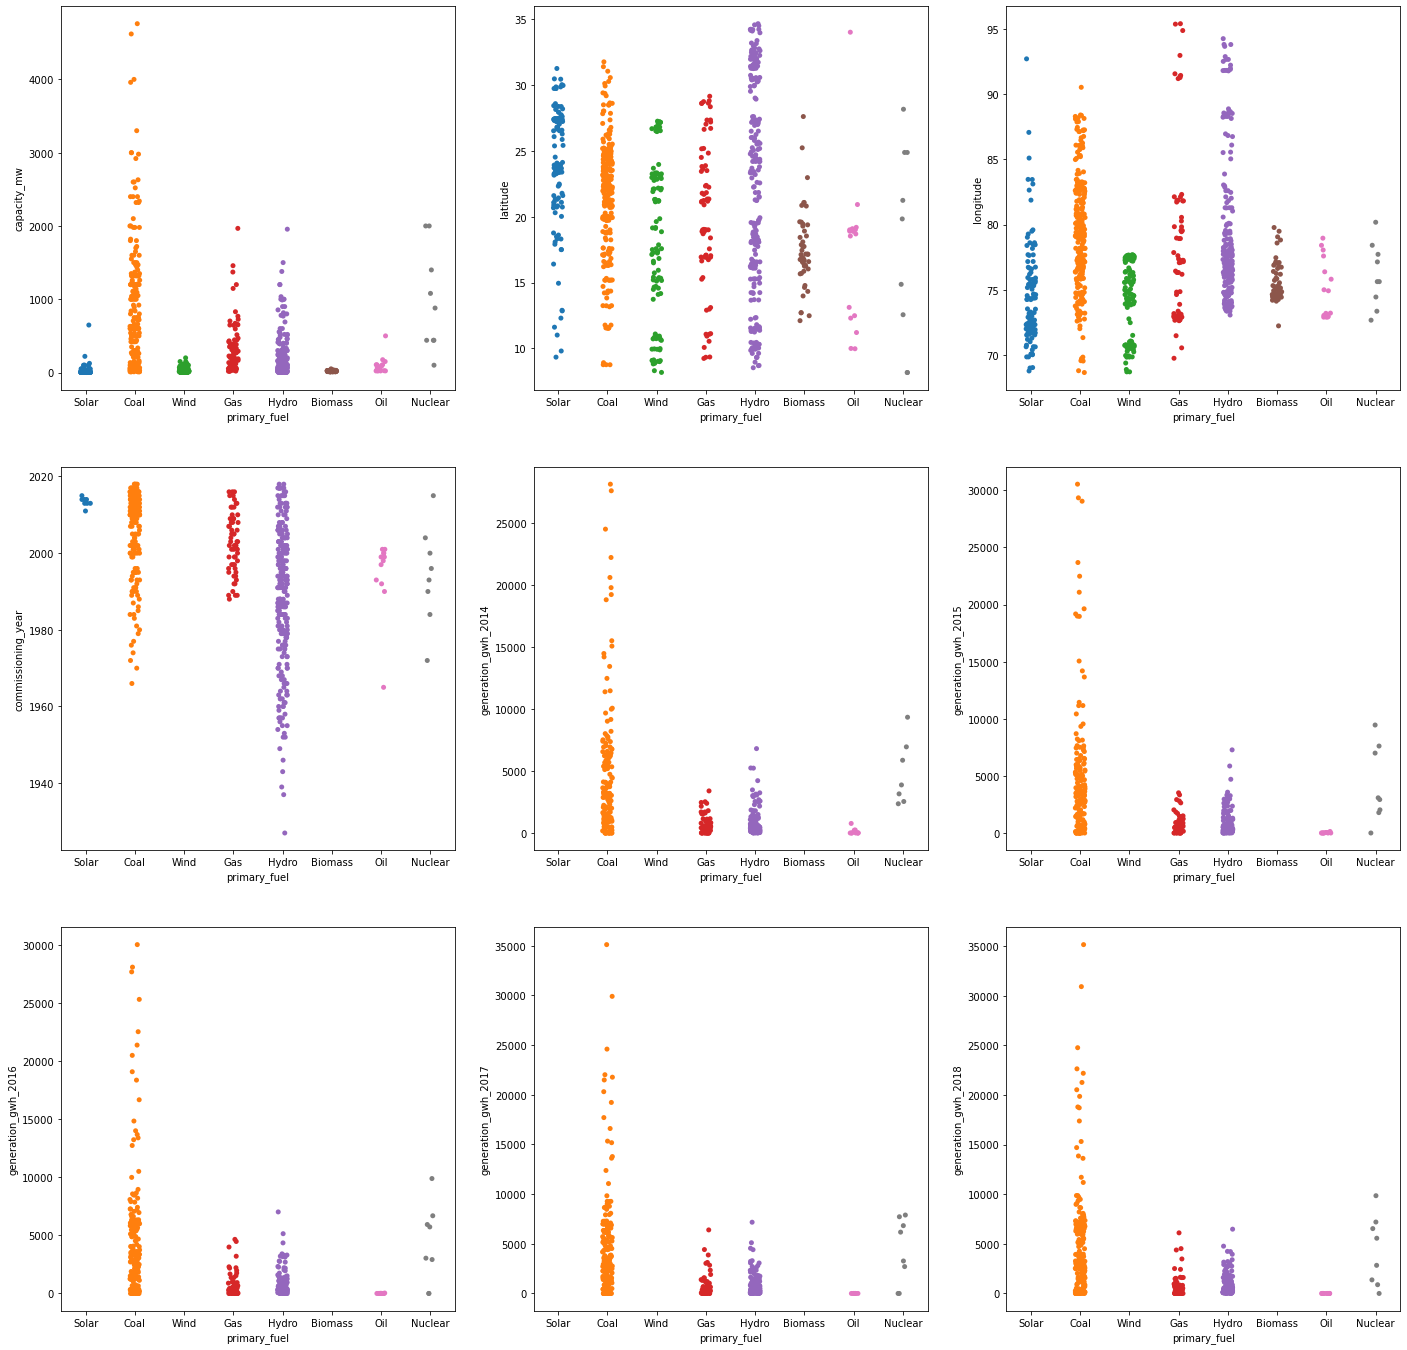

In [22]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    plt.subplot(3,3,plotnumber)
    sns.stripplot('primary_fuel', col, data=data)
    plotnumber+=1

<strong>
    <ul>
        <li>latitute and longitude has not much effect on primary_fuel</li>
        <li>If commissioning year is before 1980 fuel has to be one of coal of hydro</li>
        <li>Coal has higher generation gwh for every year</li>
        <li>The generation_gwh data for wind, solar nad biomass is not recorded</li>
    </ul>
</strong>

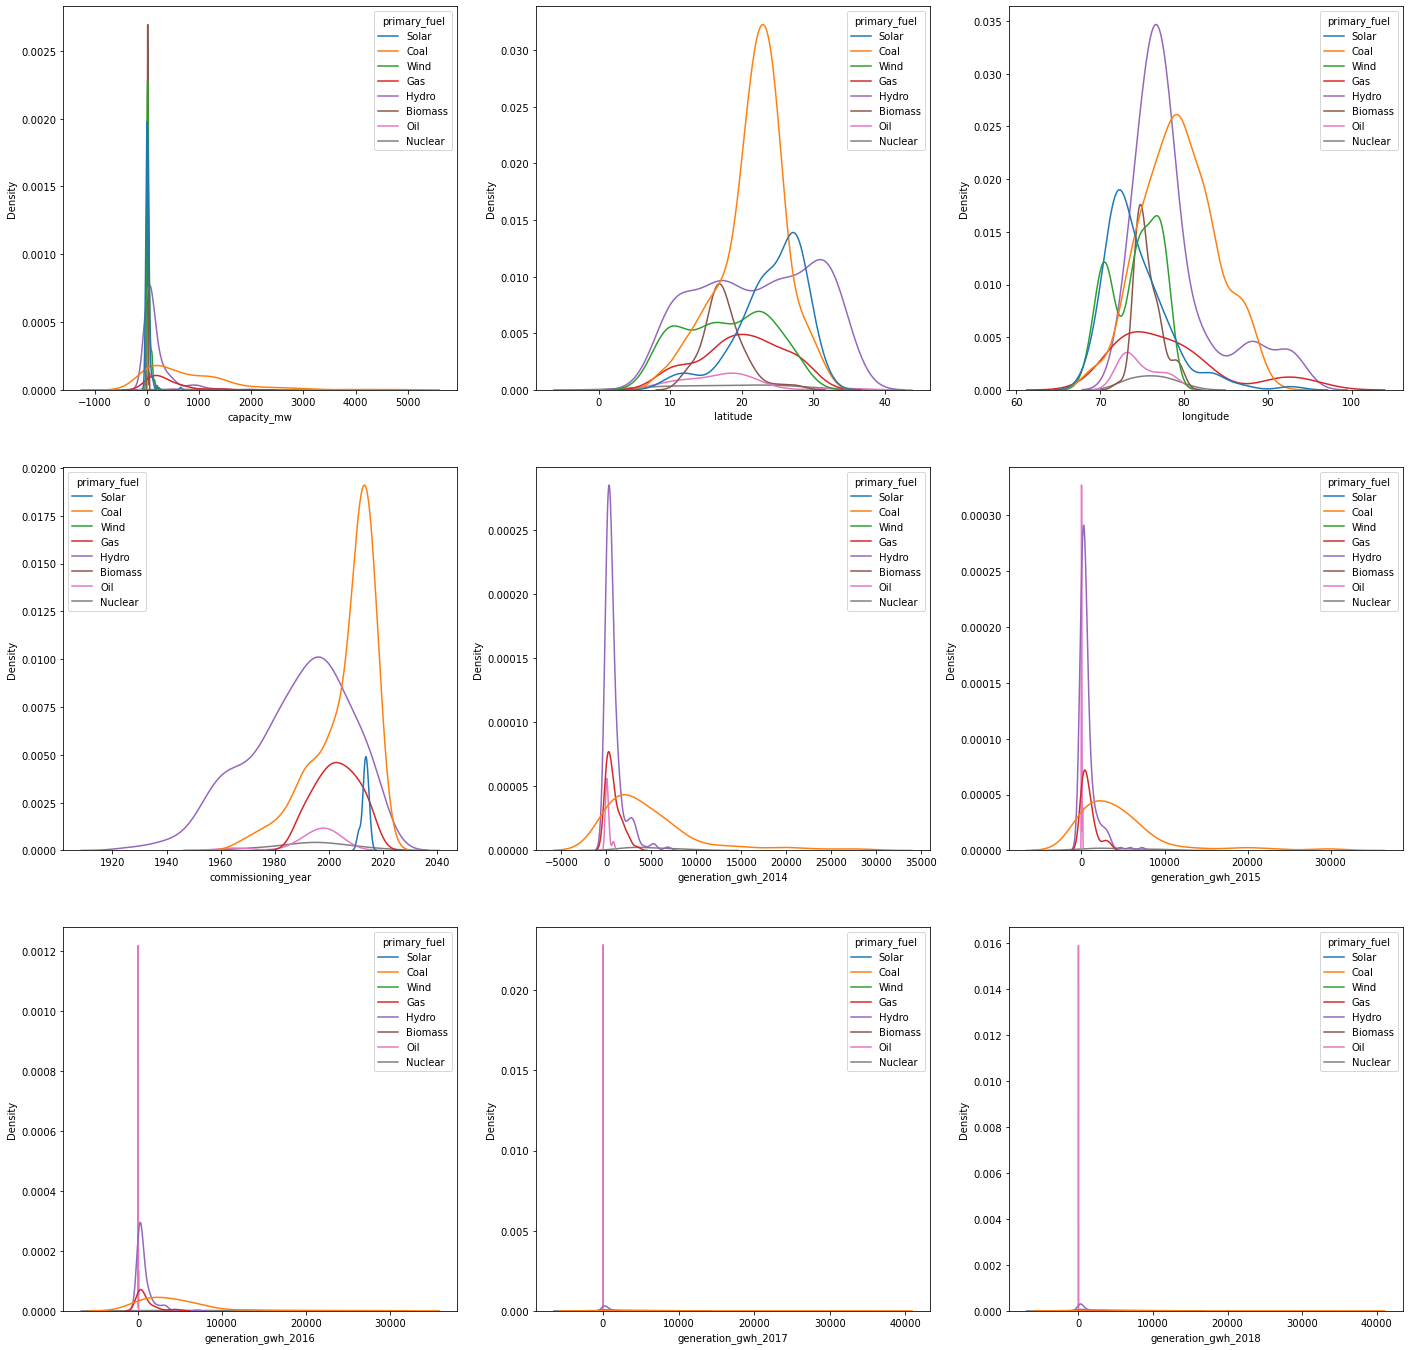

In [23]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    plt.subplot(3,3,plotnumber)
    sns.kdeplot(col,hue='primary_fuel', data=data)
    plotnumber+=1

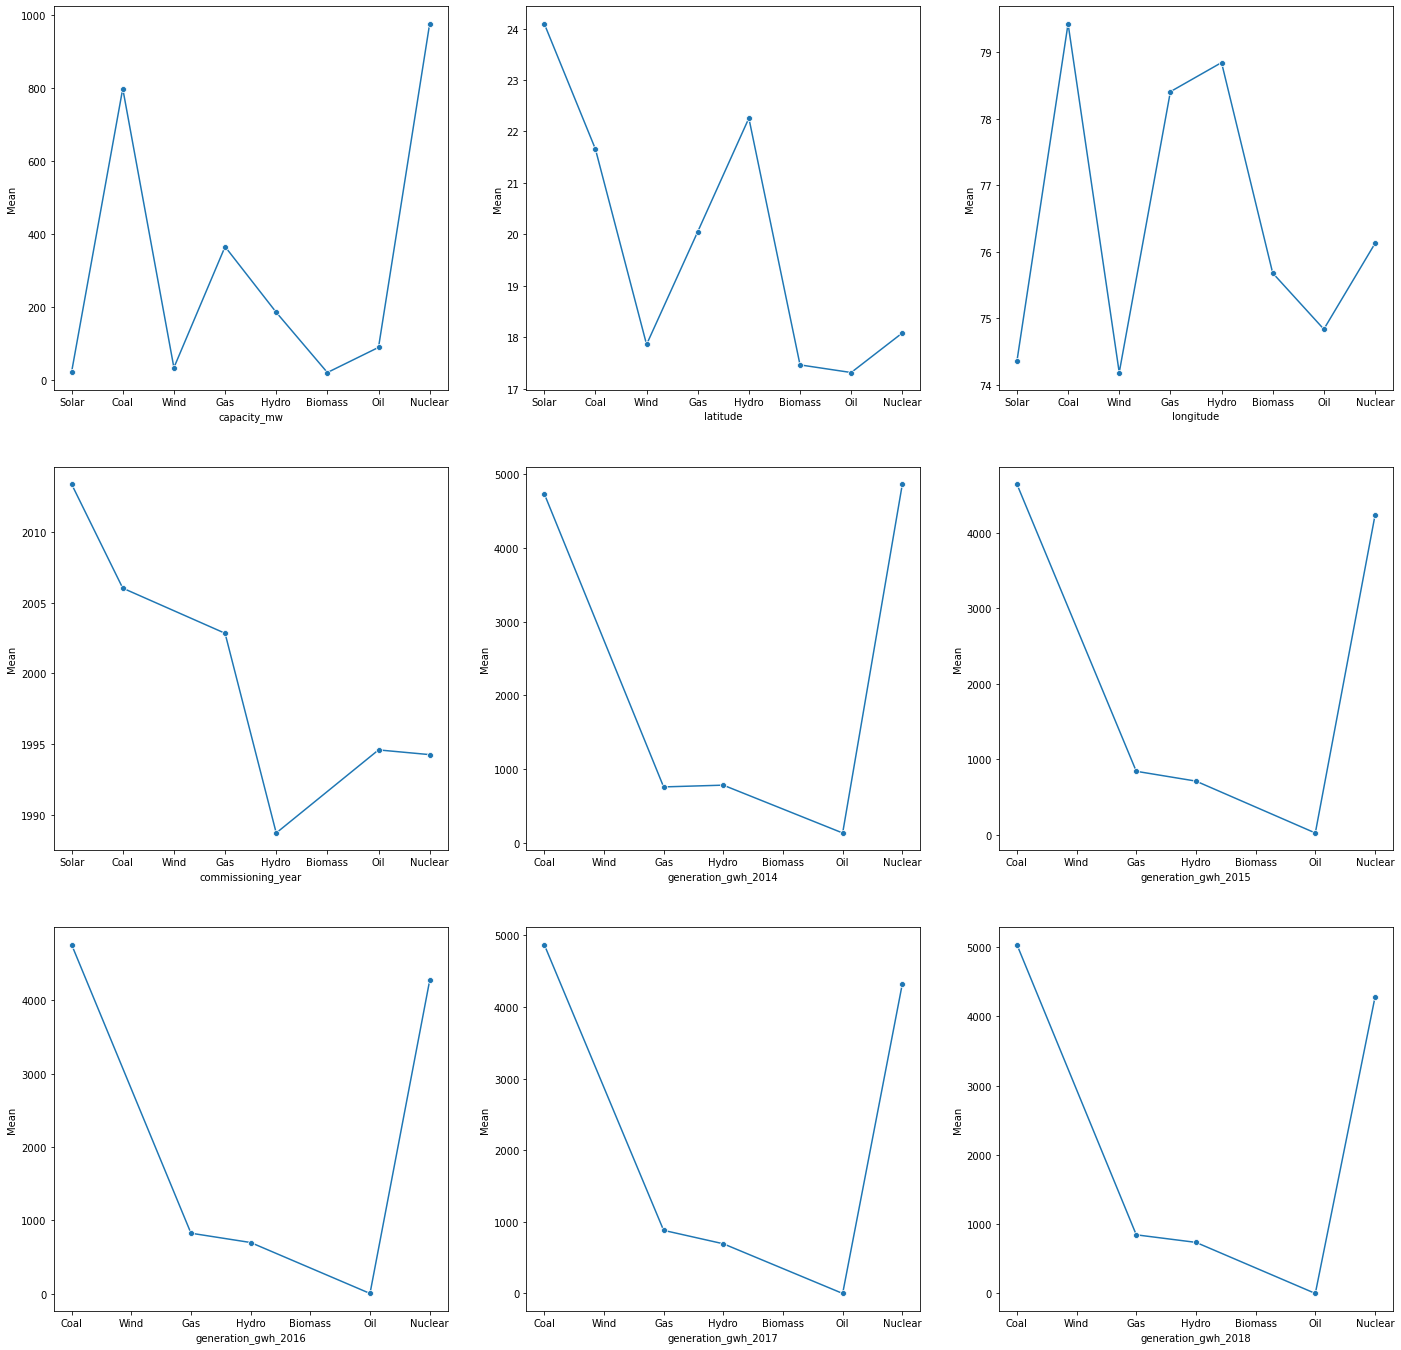

In [24]:
plt.figure(figsize=(24,24))
plotnumber = 1
for col in num_cols:
    if col in no_effective:
        continue
    mean_vals = pd.DataFrame()
    unique_val = data['primary_fuel'].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data['primary_fuel'] == val]
        mean_val = mean_val[col].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(3,3, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

<strong>All these plots infer the same meaning as seen in striplot</strong>

<h4>Correlation Matrix</h4>

In [25]:
data.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


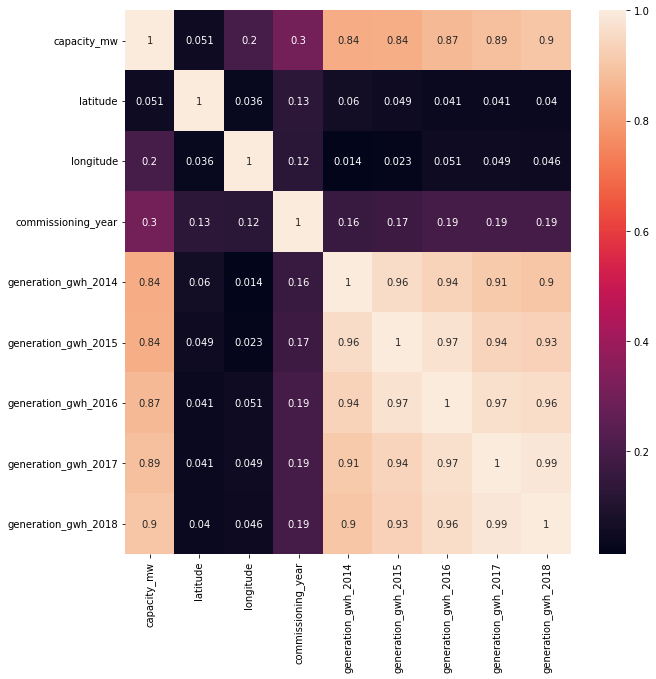

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

<strong>
    <ul>
        <li>Latitude has 5% correlation with capacity_mw</li>
        <li>Longitude has 20% correlation with capacity_mw</li>
        <li>commissioning_year has 5% correlation with capacity_mw</li>
        <li>generation_gwh_2014 has 84% correlation with capacity_mw</li>
        <li>generation_gwh_2015 has 84% correlation with capacity_mw</li>
        <li>generation_gwh_2016 has 87% correlation with capacity_mw</li>
        <li>generation_gwh_2017 has 89% correlation with capacity_mw</li>
        <li>generation_gwh_2018 has 90% correlation with capacity_mw</li>
        <li>generation_gwh_2018 has 90% correlation with generation_gwh_2014</li>
        <li>generation_gwh_2018 has 93% correlation with generation_gwh_2015</li>
        <li>generation_gwh_2018 has 96% correlation with generation_gwh_2016</li>
        <li>generation_gwh_2018 has 99% correlation with generation_gwh_2017</li>
        <li>generation_gwh_2017 has 91% correlation with generation_gwh_2014</li>
        <li>generation_gwh_2017 has 94% correlation with generation_gwh_2015</li>
        <li>generation_gwh_2017 has 97% correlation with generation_gwh_2016</li>
        <li>generation_gwh_2016 has 94% correlation with generation_gwh_2014</li>
        <li>generation_gwh_2016 has 97% correlation with generation_gwh_2015</li>
        <li>generation_gwh_2015 has 96% correlation with generation_gwh_2014</li>
    </ul>
</strong>

<h4>Descriptive Statistices</h4>

In [27]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


<ul>
    <li>capacity_mw
        <ul>
            <li>Mean -:326.223755 </li>
            <li>STD -: 590.085456	</li>
            <li>Min -: 0.000000</li>
            <li>Max -: 4760.000000</li>
        </ul>
    </li>
     <li>latitude
        <ul>
            <li>Mean -: 21.197918</li>
            <li>STD -: 6.239612</li>
            <li>Min -: 8.168900	</li>
            <li>Max -: 34.649000</li>
        </ul>
    </li>
     <li>longitude
        <ul>
            <li>Mean -: 77.464907</li>
            <li>STD -: 4.939316</li>
            <li>Min -: 68.644700</li>
            <li>Max -: 95.408000</li>
        </ul>
    </li>
     <li>commissioning_year
        <ul>
            <li>Mean -:1997.091082 </li>
            <li>STD -: 17.082868</li>
            <li>Min -: 1927.000000</li>
            <li>Max -: 2018.000000</li>
        </ul>
    </li>
     <li>generation_gwh_2014
        <ul>
            <li>Mean -: 2431.823590</li>
            <li>STD -: 4026.440035</li>
            <li>Min -: 0.00000</li>
            <li>Max -: 28127.000000</li>
        </ul>
    </li>
     <li>generation_gwh_2015
        <ul>
            <li>Mean -: 2428.226946</li>
            <li>STD -: 4194.596959</li>
            <li>Min -: 0.000000</li>
            <li>Max -: 30539.000000	</li>
        </ul>
    </li>
     <li>generation_gwh_2016
        <ul>
            <li>Mean -: 2467.936859</li>
            <li>STD -: 4162.884308</li>
            <li>Min -: 0.000000</li>
            <li>Max -: 30015.000000</li>
        </ul>
    </li>
     <li>generation_gwh_2017
        <ul>
            <li>Mean -: 2547.759305</li>
            <li>STD -: 4196.991169</li>
            <li>Min -:0.000000 </li>
            <li>Max -: 35116.000000</li>
        </ul>
    </li>
    <li>generation_gwh_2018
        <ul>
            <li>Mean -: 2600.804099</li>
            <li>STD -: 4314.880456</li>
            <li>Min -:0.000000 </li>
            <li>Max -: 35136.000000</li>
        </ul>
    </li>
</ul>

<h4>Pairplot</h4>

<Figure size 1440x1440 with 0 Axes>

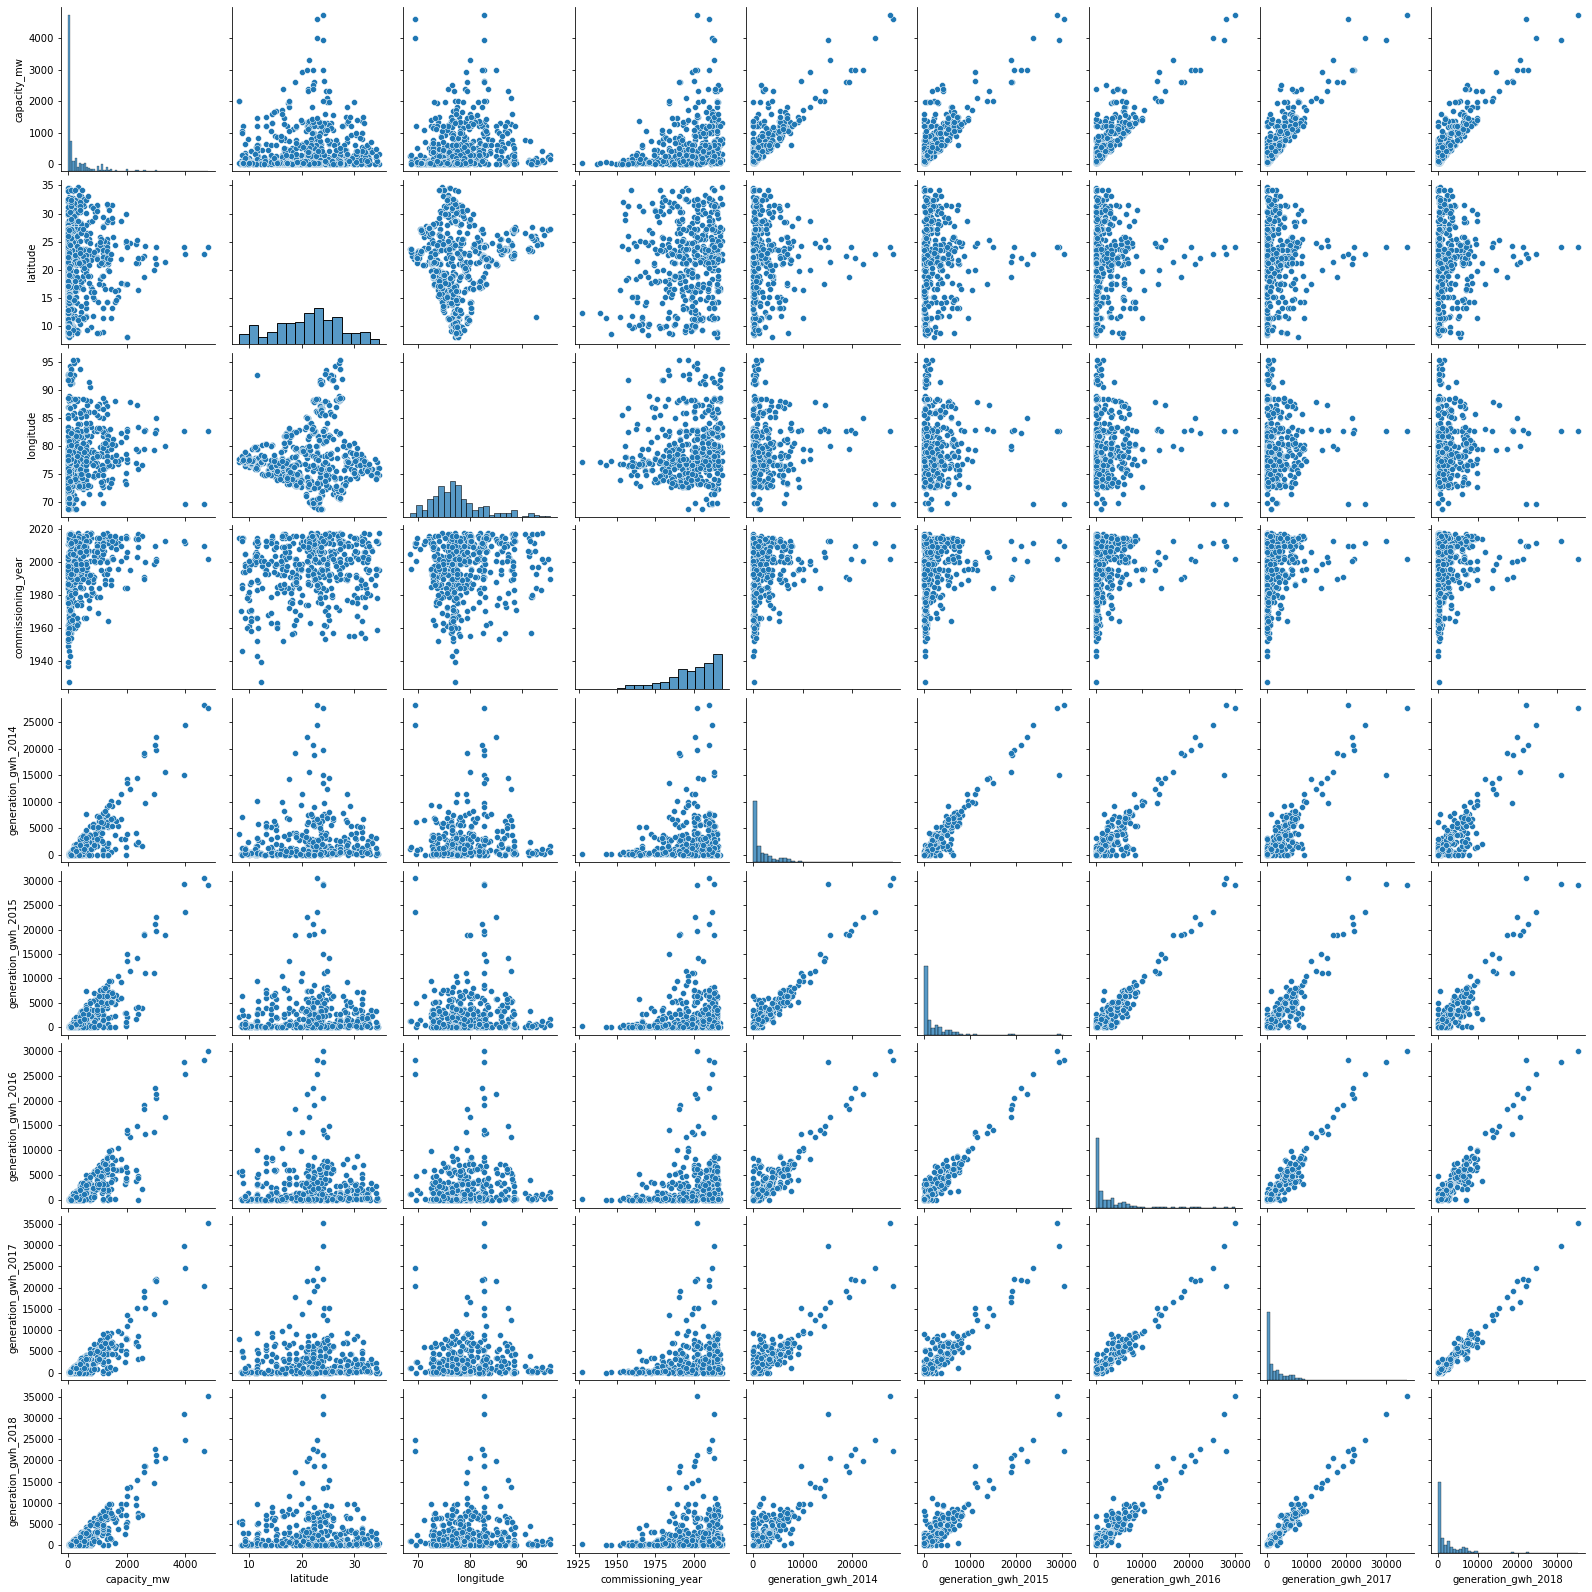

In [28]:
plt.figure(figsize=(20,20))

sns.pairplot(data)

<h4>Imputing Missing Values</h4>

In [29]:
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

In [30]:
it_imp = IterativeImputer()
it_img = pd.DataFrame(it_imp.fit_transform(data[['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']]), columns=['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'])

In [31]:
it_img.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [32]:
cols = ['latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

for col in cols:
    data[col] = it_img[col]

In [33]:
data.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
other_fuel2               906
commissioning_year          0
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

<strong>Now there are no null values in the numerical columns</strong>

<h4>Handling Outliers</h4>

In [34]:
num_cols = ['latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
X_reg = data[num_cols]


In [35]:
X_reg.isnull().sum()

latitude               0
longitude              0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

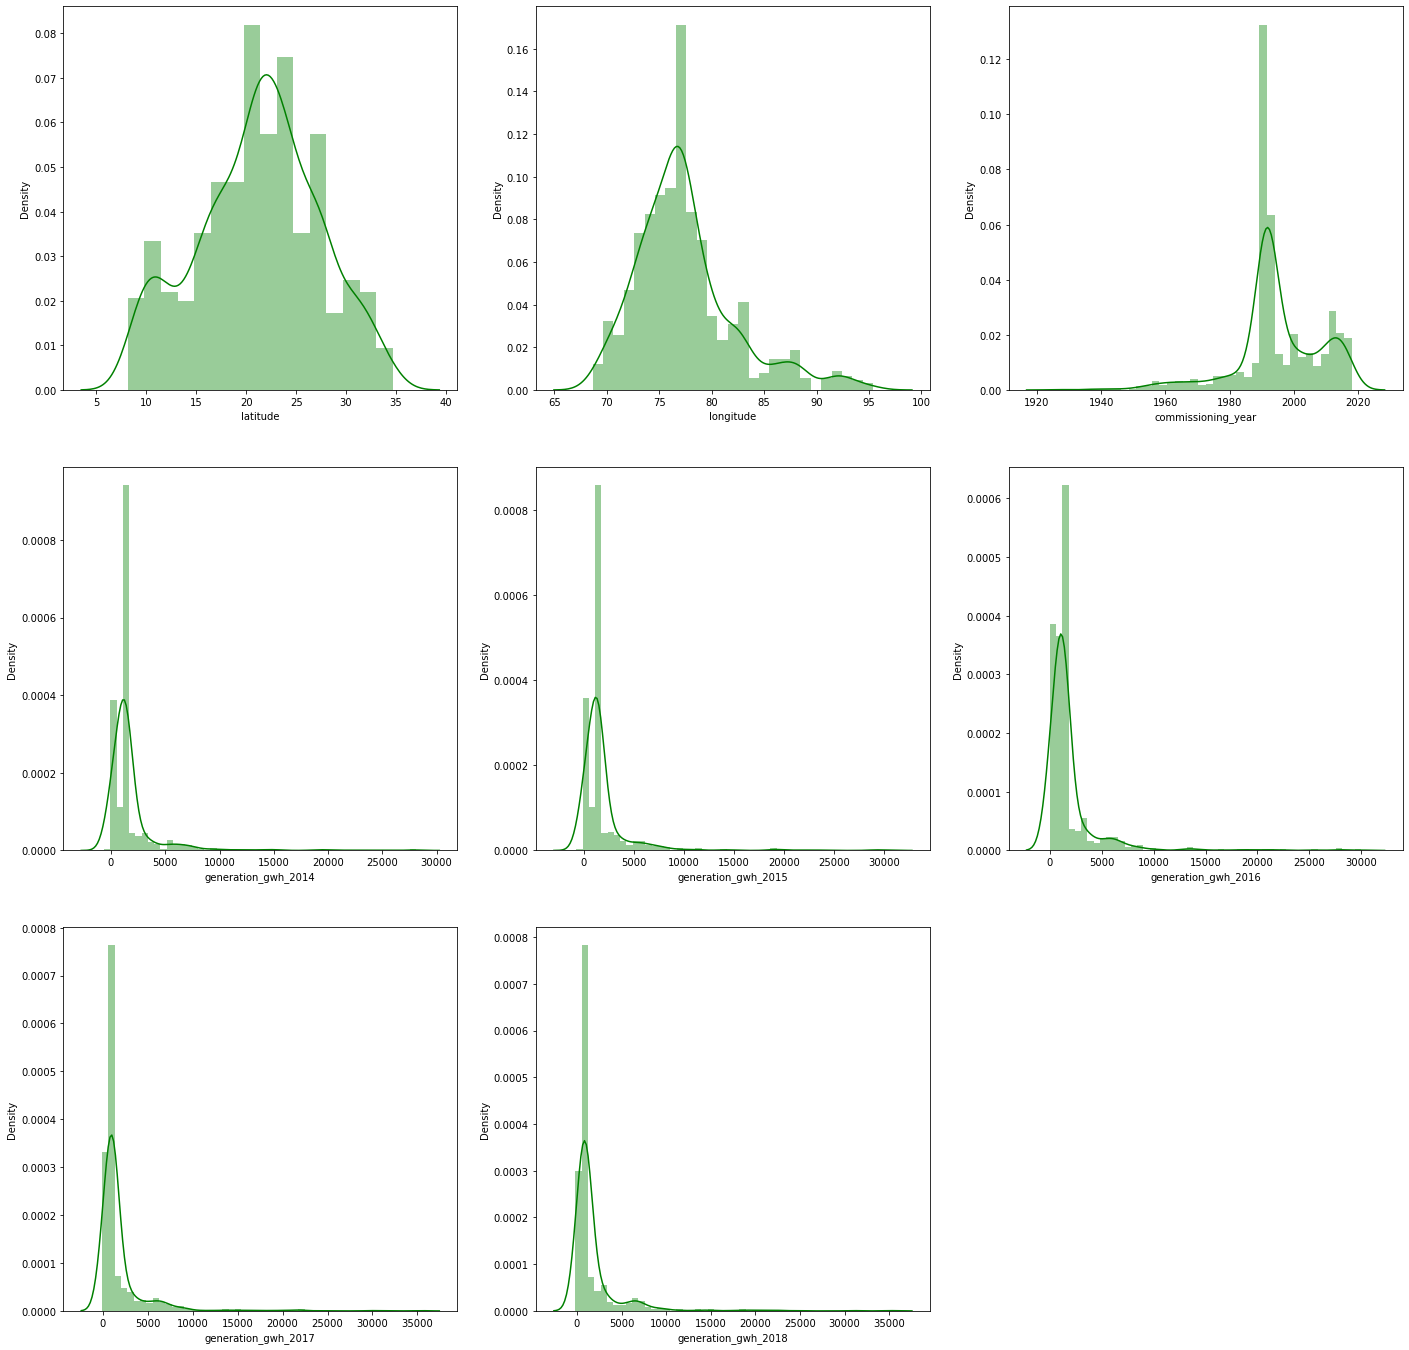

In [36]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in X_reg.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(X_reg[col], color='green')
    plotnumber+=1


In [37]:
X_reg.skew()

latitude              -0.146154
longitude              1.154150
commissioning_year    -0.826330
generation_gwh_2014    5.272076
generation_gwh_2015    5.565814
generation_gwh_2016    5.330031
generation_gwh_2017    5.340576
generation_gwh_2018    5.157503
dtype: float64

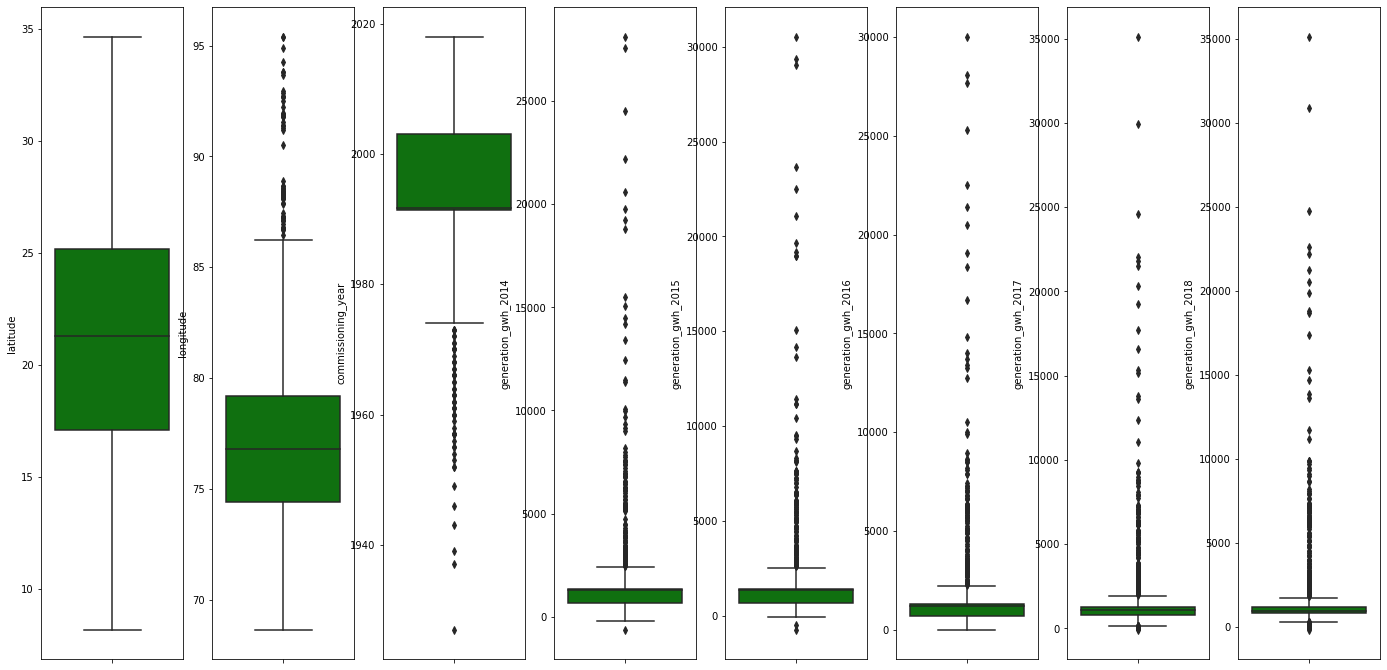

In [38]:
plt.figure(figsize=(24,12))
plotnumber=1
for col in X_reg.columns:
    plt.subplot(1,8,plotnumber)
    sns.boxplot(y=X_reg[col], color='green')
    plotnumber+=1

<strong>There are more outliers in generation_gwh columns</strong>

<strong>Some columns are skewed in this dataset. Let's use z-score technique</strong>

In [39]:
from scipy.stats import zscore
z = np.abs(zscore(X_reg))

data_reg = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_reg.shape)
print("Total Dropped Rows", data.shape[0] - data_reg.shape[0])

Old Shape (907, 17)
New Shape (863, 17)
Total Dropped Rows 44


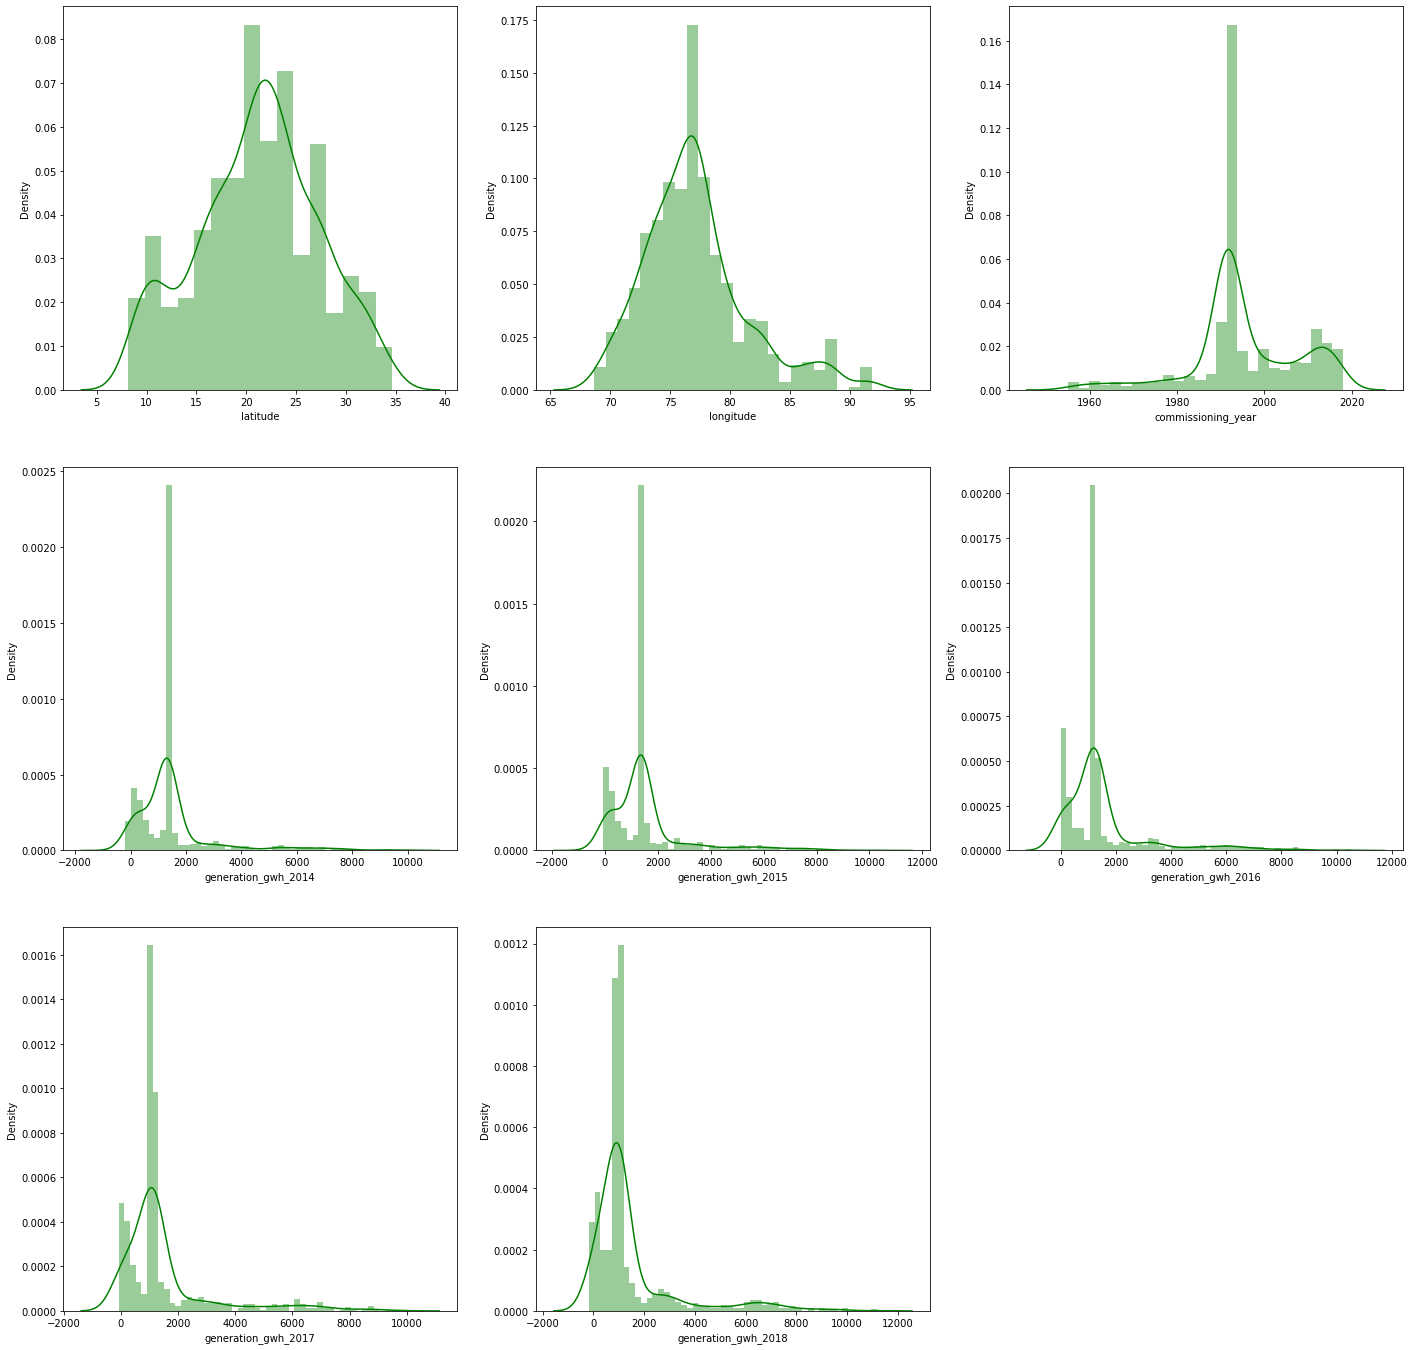

In [40]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    plt.subplot(3,3,plotnumber)
    sns.distplot(data_reg[col], color='green')
    plotnumber+=1

In [41]:
data_reg[num_cols].skew()

latitude              -0.112158
longitude              0.944179
commissioning_year    -0.391567
generation_gwh_2014    2.659127
generation_gwh_2015    2.445198
generation_gwh_2016    2.505030
generation_gwh_2017    2.446921
generation_gwh_2018    2.567845
dtype: float64

<strong>Skew is lightly removed. Let's remove it further using power_transform</strong>

In [42]:
from sklearn.preprocessing import power_transform


for col in num_cols:
    data_reg[col] = power_transform(np.array(data_reg[col]).reshape(-1,1), method='yeo-johnson').reshape(863,)

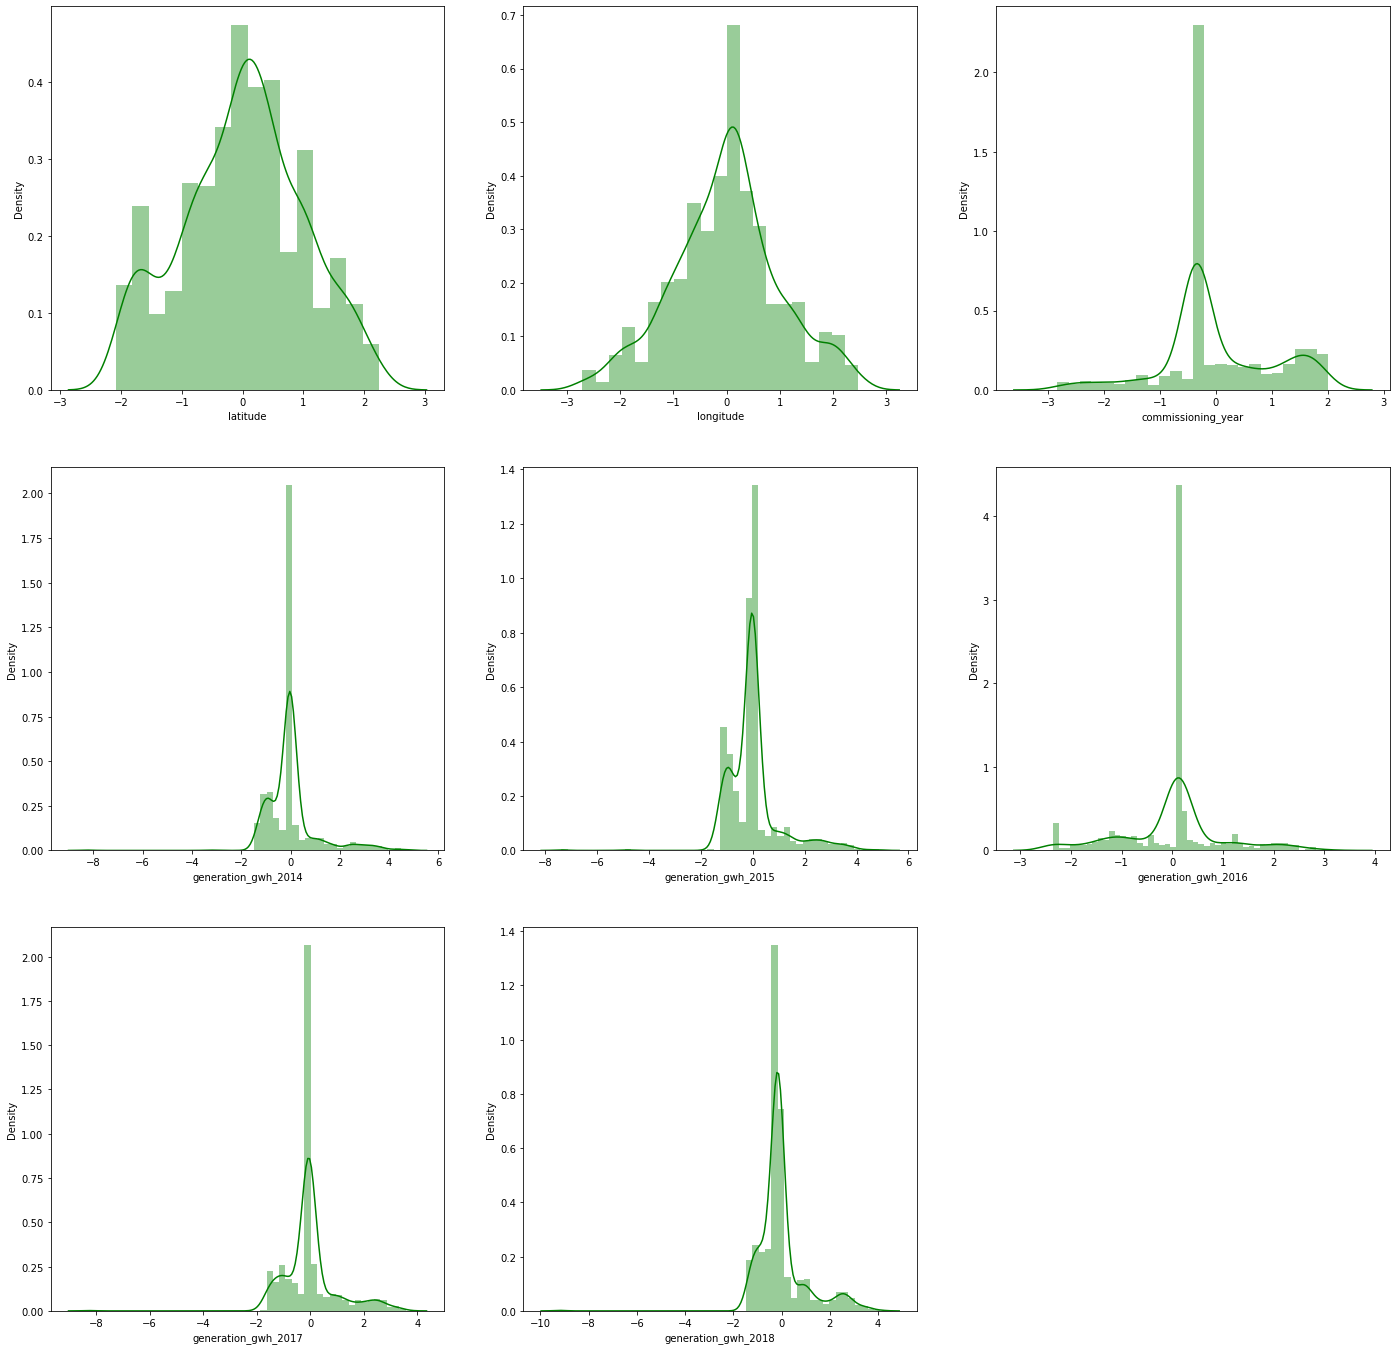

In [43]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols:
    plt.subplot(3,3,plotnumber)
    sns.distplot(data_reg[col], color='green')
    plotnumber+=1

In [44]:
data_reg[num_cols].skew()

latitude              -0.069137
longitude             -0.000724
commissioning_year     0.012056
generation_gwh_2014    1.068467
generation_gwh_2015    1.038497
generation_gwh_2016    0.031989
generation_gwh_2017    0.412723
generation_gwh_2018    0.575899
dtype: float64

<strong>Skew is now removed for almost all columns</strong>

<h4>Scaling the dataset</h4>

In [45]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

for col in num_cols:
    data_reg[col] = sc.fit_transform(np.array(data_reg[col]).reshape(-1,1)).reshape(863,)

In [46]:
data_reg.mean()

capacity_mw            2.797766e+02
latitude              -2.470021e-17
longitude             -4.116702e-18
commissioning_year    -2.058351e-18
generation_gwh_2014    1.646681e-17
generation_gwh_2015   -2.058351e-18
generation_gwh_2016   -1.440846e-17
generation_gwh_2017   -8.233404e-18
generation_gwh_2018   -1.646681e-17
dtype: float64

<strong>Mean is now close to zero for all varaibles</strong>

<h4>Preprocessing for classification problem</h4>

In [47]:
num_cols_cla = ['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
X_cla = data[num_cols_cla]

In [48]:
from scipy.stats import zscore
z = np.abs(zscore(X_cla))

data_cla = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_cla.shape)
print("Total Dropped Rows", data.shape[0] - data_cla.shape[0])

Old Shape (907, 17)
New Shape (857, 17)
Total Dropped Rows 50


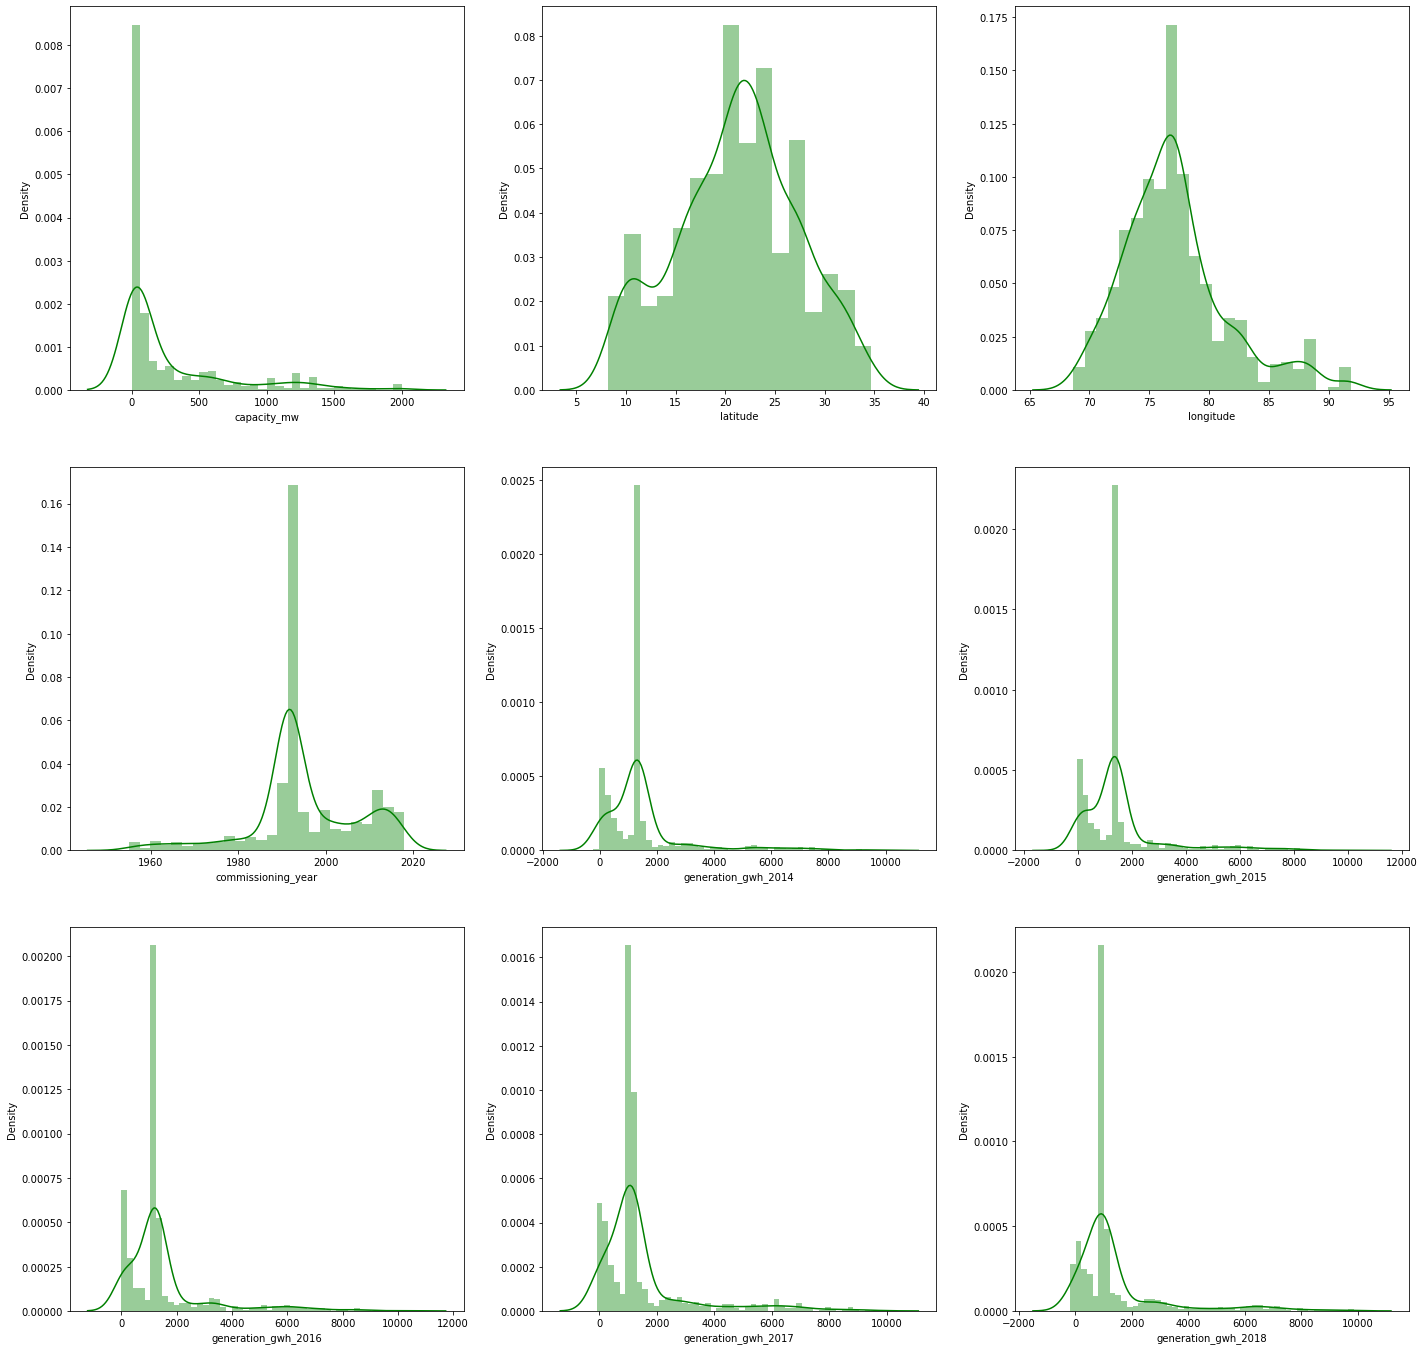

In [49]:
plt.figure(figsize=(24,24))
plotnumber=1
for col in num_cols_cla:
    plt.subplot(3,3,plotnumber)
    sns.distplot(data_cla[col], color='green')
    plotnumber+=1

In [50]:
for col in num_cols_cla:
    data_cla[col] = power_transform(np.array(data_cla[col]).reshape(-1,1), method='yeo-johnson').reshape(857,)

In [51]:
for col in num_cols_cla:
    data_cla[col] = sc.fit_transform(np.array(data_cla[col]).reshape(-1,1)).reshape(857,)

In [52]:
data_cla[num_cols_cla].mean()

capacity_mw           -2.033897e-17
latitude               1.450933e-17
longitude             -4.437006e-18
commissioning_year    -3.821655e-18
generation_gwh_2014    2.609575e-17
generation_gwh_2015   -2.832437e-17
generation_gwh_2016    7.125119e-18
generation_gwh_2017    7.206086e-19
generation_gwh_2018    2.882434e-18
dtype: float64

In [53]:
data_cla[num_cols_cla].skew()

capacity_mw            0.016541
latitude              -0.070329
longitude             -0.000072
commissioning_year     0.013687
generation_gwh_2014    0.780678
generation_gwh_2015    0.829974
generation_gwh_2016    0.038391
generation_gwh_2017    0.429023
generation_gwh_2018    0.599446
dtype: float64

In [54]:
X_reg = data_reg.drop(columns=['capacity_mw'])
y_reg = data_reg['capacity_mw']

X_cla = data_cla.drop(columns=['primary_fuel'])
y_cla = data_cla['primary_fuel']

In [55]:
X_reg[num_cols].isnull().sum()

latitude               0
longitude              0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [56]:
y_reg.isnull().sum()

0

In [57]:
X_cla[num_cols_cla].isnull().sum()

capacity_mw            0
latitude               0
longitude              0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [58]:
y_cla.isnull().sum()

0

<h4>Encoding using get_dummies</h4>

In [59]:
X_reg = pd.get_dummies(X_reg,dummy_na=False)
print(X_reg.shape)

(863, 495)


In [60]:
X_cla = pd.get_dummies(X_cla, dummy_na=False)

In [61]:
print(X_cla.shape)

(857, 488)


<h4>Checking for multicollinearity</h4>

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols = ['latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols].values, i) for i in range(X_reg[num_cols].shape[1])]
vif["Features"] = X_reg[num_cols].columns
vif.nlargest(6, 'vif')

,vif,Features
6,28.023703,generation_gwh_2017
7,17.858568,generation_gwh_2018
4,9.608455,generation_gwh_2015
5,8.777083,generation_gwh_2016
3,6.779053,generation_gwh_2014
2,1.168444,commissioning_year


In [63]:
num_cols.remove('generation_gwh_2017')
X_reg = X_reg.drop(columns=['generation_gwh_2017'])
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols].values, i) for i in range(X_reg[num_cols].shape[1])]
vif["Features"] = X_reg[num_cols].columns
vif.nlargest(6, 'vif')

,vif,Features
4,9.497061,generation_gwh_2015
3,6.755319,generation_gwh_2014
5,5.589477,generation_gwh_2016
6,3.558005,generation_gwh_2018
2,1.167584,commissioning_year
1,1.086300,longitude


In [64]:
num_cols.remove('generation_gwh_2015')
X_reg = X_reg.drop(columns=['generation_gwh_2015'])
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_reg[num_cols].values, i) for i in range(X_reg[num_cols].shape[1])]
vif["Features"] = X_reg[num_cols].columns
vif.nlargest(6, 'vif')

,vif,Features
4,4.698817,generation_gwh_2016
5,3.553355,generation_gwh_2018
3,2.491350,generation_gwh_2014
2,1.154740,commissioning_year
1,1.085937,longitude
0,1.019437,latitude


<strong>VIF is below 5 for all numerical columns</strong>

<h5>For classification data</h5>

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_cols_cla = ['capacity_mw','latitude','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

,vif,Features
7,28.729498,generation_gwh_2017
8,20.243605,generation_gwh_2018
5,9.601452,generation_gwh_2015
6,9.388373,generation_gwh_2016
4,6.860602,generation_gwh_2014
0,1.724188,capacity_mw


In [66]:
num_cols_cla.remove('generation_gwh_2017')
X_cla = X_cla.drop(columns=['generation_gwh_2017'])
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

,vif,Features
5,9.477889,generation_gwh_2015
4,6.854873,generation_gwh_2014
6,6.252542,generation_gwh_2016
7,4.719776,generation_gwh_2018
0,1.720223,capacity_mw
3,1.283886,commissioning_year


In [67]:
num_cols_cla.remove('generation_gwh_2015')
X_cla = X_cla.drop(columns=['generation_gwh_2015'])
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

,vif,Features
5,5.501863,generation_gwh_2016
6,4.694136,generation_gwh_2018
4,2.688891,generation_gwh_2014
0,1.718483,capacity_mw
3,1.272933,commissioning_year
2,1.171105,longitude


In [68]:
num_cols_cla.remove('generation_gwh_2016')
X_cla = X_cla.drop(columns=['generation_gwh_2016'])
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_cla[num_cols_cla].values, i) for i in range(X_cla[num_cols_cla].shape[1])]
vif["Features"] = X_cla[num_cols_cla].columns
vif.nlargest(6, 'vif')

,vif,Features
5,2.243428,generation_gwh_2018
4,1.947422,generation_gwh_2014
0,1.551916,capacity_mw
3,1.262003,commissioning_year
2,1.170341,longitude
1,1.018573,latitude


In [69]:
print(X_reg.shape)

(863, 493)


In [70]:
print(X_cla.shape)

(857, 485)


<h3>Building and Trainig Models</h3>

<h4>For Regression Problem</h4>

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=2)
print(X_train.shape)
print(X_test.shape)

(604, 493)
(259, 493)


<h4>Linear Regression</h4>

Cross Val Scores [-9.01328034e+24 -1.32273258e+25 -2.32385315e+25 -2.61270668e+24
 -6.64212408e+22]
Corss Validation Score Mean===> -9.63165309379352e+24
________________________________
Training R2 Score : 0.7944156032097914
Training MSE      : 44673.86517913907
Training MAE      : 114.20327814569536
Training RMSE     : 211.36192935138314
________________________________
Testing R2 Score : -1.4435856280109292e+25
Testing MSE      : 2.609482703294279e+30
Testing MAE      : 637208206970651.4
Testing RMSE     : 1615389334895547.5


Text(0.5, 1.0, 'Training Data')

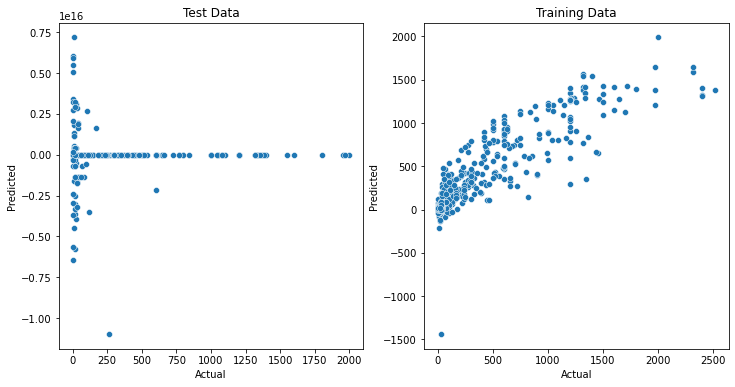

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print('Cross Val Scores', cross_val_score(lr, X_train, y_train, cv=5, scoring='r2'))
print("Corss Validation Score Mean===>", cross_val_score(lr, X_train, y_train, cv=5).mean())
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lr.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>This model is overfitting on trainig data</strong>

In [73]:
lrcv = LinearRegression()


grid_parmas = {
    'fit_intercept':[True, False],
    'positive':[True, False]
}
grid_lr = GridSearchCV(lrcv, param_grid = grid_parmas, cv=3, verbose=3)
grid_lr.fit(X_train, y_train)

print('Best Score -:', grid_lr.best_score_)
print('Best Params -:', grid_lr.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END fit_intercept=True, positive=True;, score=-23660957473636107757289472.000 total time=   0.0s
[CV 2/3] END .fit_intercept=True, positive=True;, score=0.689 total time=   0.0s
[CV 3/3] END fit_intercept=True, positive=True;, score=-18449710839518812478373888.000 total time=   0.0s
[CV 1/3] END fit_intercept=True, positive=False;, score=-1188683724208983181885440.000 total time=   0.0s
[CV 2/3] END fit_intercept=True, positive=False;, score=-36596325137263013920768.000 total time=   0.0s
[CV 3/3] END fit_intercept=True, positive=False;, score=-15671209623539574374400.000 total time=   0.0s
[CV 1/3] END fit_intercept=False, positive=True;, score=0.805 total time=   0.0s
[CV 2/3] END fit_intercept=False, positive=True;, score=0.692 total time=   0.0s
[CV 3/3] END fit_intercept=False, positive=True;, score=0.728 total time=   0.0s
[CV 1/3] END fit_intercept=False, positive=False;, score=-898843655514827259904.000 total 

Corss Validation Score Mean===> 0.7365015456997972
________________________________
Training R2 Score : 0.7914995561442496
Training MSE      : 45307.52753628271
Training MAE      : 107.45487082093103
Training RMSE     : 212.85564952869518
________________________________
Testing R2 Score : 0.7452090092465417
Testing MSE      : 46057.031216254836
Testing MAE      : 119.57464962792916
Testing RMSE     : 214.60901941962933


Text(0.5, 1.0, 'Training Data')

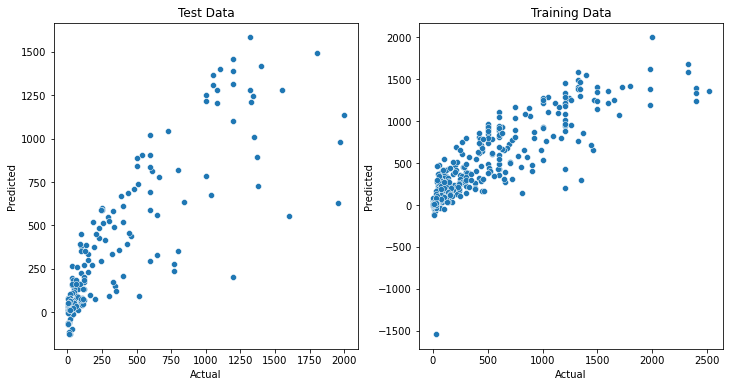

In [78]:
lrcv =  LinearRegression(positive=True, fit_intercept=False)

print("Corss Validation Score Mean===>", cross_val_score(lrcv, X_train, y_train, cv=5).mean())
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = lrcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>HyperParameter Tuning is working better than plane Model</strong>

<h4>KNeighborsRegressor</h4>

Corss Validation Score Mean===> 0.7954290317374955
________________________________
Training R2 Score : 0.8670974670132073
Training MSE      : 28879.963330470197
Training MAE      : 83.97522847682119
Training RMSE     : 169.94105840105325
________________________________
Testing R2 Score : 0.7434744253408777
Testing MSE      : 46370.5814907529
Testing MAE      : 102.51076061776062
Testing RMSE     : 215.3382954579907


Text(0.5, 1.0, 'Training Data')

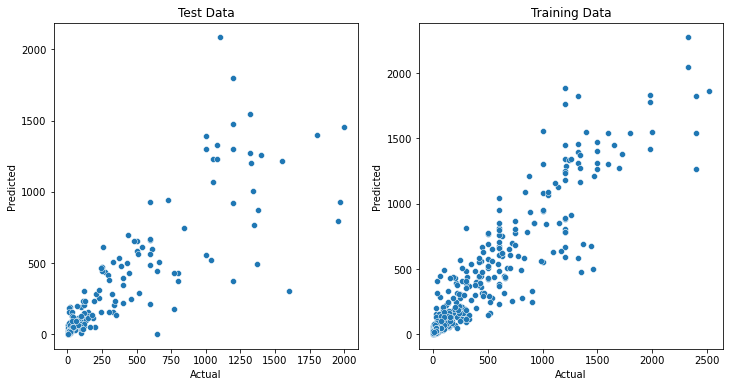

In [79]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
print("Corss Validation Score Mean===>", cross_val_score(knn, X_train, y_train, cv=5).mean())
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knn.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [80]:
knncv = KNeighborsRegressor()

grid_param = {
    'n_neighbors':[3,4,5,6,7],
    'weights' : ['uniform', 'distance'],
    'p':[1,2]
}

grid_knn = GridSearchCV(knncv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=3)
grid_knn.fit(X_train, y_train)

print('Best Score -:', grid_knn.best_score_)
print('Best Params -:', grid_knn.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Score -: 0.8102056673054023
Best Params -: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


Corss Validation Score Mean===> 0.8056554914663476
________________________________
Training R2 Score : 1.0
Training MSE      : 0.0
Training MAE      : 0.0
Training RMSE     : 0.0
________________________________
Testing R2 Score : 0.7676208109749488
Testing MSE      : 42005.78494272955
Testing MAE      : 97.28239140349628
Testing RMSE     : 204.95312864830717


Text(0.5, 1.0, 'Training Data')

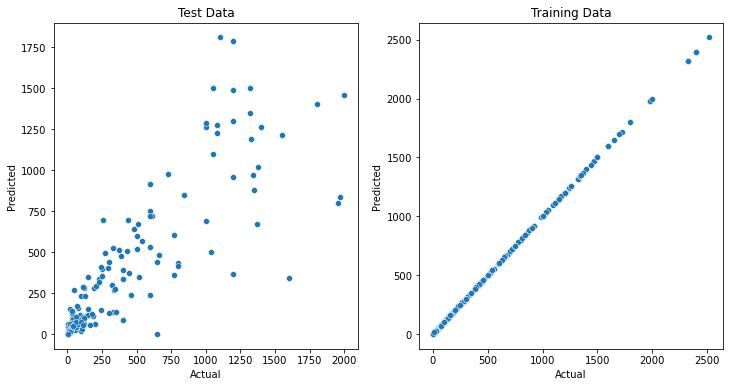

In [81]:
knncv = KNeighborsRegressor(n_neighbors=5, p=1,weights='distance')

print("Corss Validation Score Mean===>", cross_val_score(knncv, X_train, y_train, cv=5).mean())
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = knncv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>LinearRegression Model was performing better as it had low difference between cross val score and testing data</strong>

<h4>Desision Tree Regressor</h4>

Corss Validation Score Mean===> 0.6934263946862227
________________________________
Training R2 Score : 1.0
Training MSE      : 0.0
Training MAE      : 0.0
Training RMSE     : 0.0
________________________________
Testing R2 Score : 0.6082444368892153
Testing MSE      : 70815.29117642084
Testing MAE      : 113.54722393822394
Testing RMSE     : 266.11142624175466


Text(0.5, 1.0, 'Training Data')

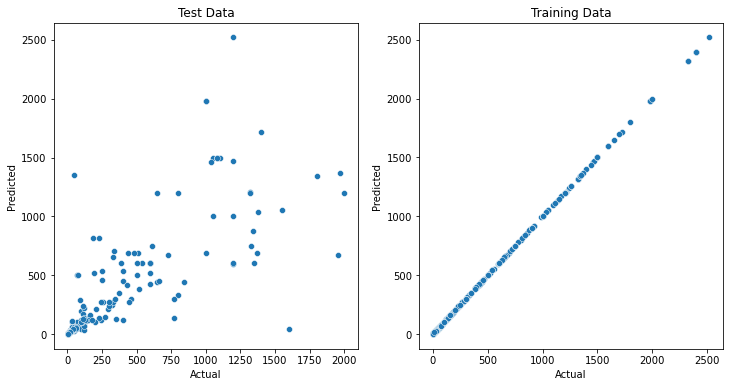

In [82]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
print("Corss Validation Score Mean===>", cross_val_score(dt, X_train, y_train, cv=5).mean())
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = dt.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [84]:
dtcv = DecisionTreeRegressor()

param_grid = {
    'max_depth':[None, 3,4,5,6,7,8,9],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8],
    'max_leaf_nodes':[10,15,20,25,30,35,40,35,50,55,60,75,80, None]
}

grid_dt = GridSearchCV(dtcv, param_grid = param_grid, cv=3)

grid_dt.fit(X_train, y_train)
print('Best Score -->', grid_dt.best_score_)
print('Best Params -->', grid_dt.best_params_)

Best Score --> 0.7546030944068275
Best Params --> {'max_depth': 7, 'max_leaf_nodes': 55, 'min_samples_leaf': 8, 'min_samples_split': 6}


Corss Validation Score Mean===> 0.7542735763831118
________________________________
Training R2 Score : 0.8885695569213571
Training MSE      : 24214.03894784351
Training MAE      : 75.8881173470965
Training RMSE     : 155.6086082061128
________________________________
Testing R2 Score : 0.700819960963281
Testing MSE      : 54080.97184459602
Testing MAE      : 100.99192831976313
Testing RMSE     : 232.55315917999485


Text(0.5, 1.0, 'Training Data')

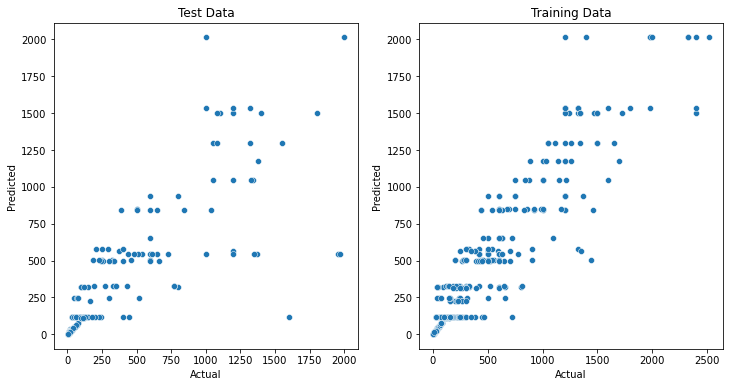

In [85]:
dtcv = DecisionTreeRegressor(max_leaf_nodes=55, min_samples_leaf=8, min_samples_split=6, max_depth=7)

print("Corss Validation Score Mean===>", cross_val_score(dtcv, X_train, y_train, cv=5).mean())
dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = dtcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>Linear Regression was performing better than this model</strong>

<h4>AdaBoost Regressor</h4>

Corss Validation Score Mean===> 0.637144075901521
________________________________
Training R2 Score : 0.7012907172130163
Training MSE      : 64910.073115133404
Training MAE      : 242.0149776397251
Training RMSE     : 254.77455350786784
________________________________
Testing R2 Score : 0.5013802118804243
Testing MSE      : 90132.49282698182
Testing MAE      : 264.85865518247584
Testing RMSE     : 300.22074016793346


Text(0.5, 1.0, 'Training Data')

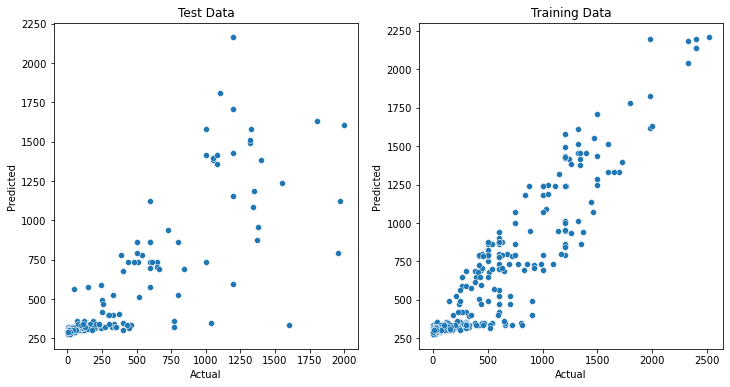

In [86]:
from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()

print("Corss Validation Score Mean===>", cross_val_score(ad, X_train, y_train, cv=5).mean())
ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = ad.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tunning</h4>

In [87]:
adcv = AdaBoostRegressor()

grid_params = {
    'n_estimators':[10,20,30,50,100, 150],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8],
    'loss' : ['linear', 'square', 'exponential']
}

grid_ad = GridSearchCV(adcv, param_grid = grid_params, cv=3, n_jobs=-1, verbose=3)
grid_ad.fit(X_train,y_train)
print('Best Score -->', grid_ad.best_score_)
print('Best Params -->', grid_ad.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Score --> 0.805284648451769
Best Params --> {'learning_rate': 0.05, 'loss': 'square', 'n_estimators': 10}


Corss Validation Score Mean===> 0.7968136498692908
________________________________
Training R2 Score : 0.8681230442050765
Training MSE      : 28657.103532179586
Training MAE      : 95.79834082840961
Training RMSE     : 169.28409119636606
________________________________
Testing R2 Score : 0.7305375038012454
Testing MSE      : 48709.11079836736
Testing MAE      : 110.23733730547015
Testing RMSE     : 220.70140642589334


Text(0.5, 1.0, 'Training Data')

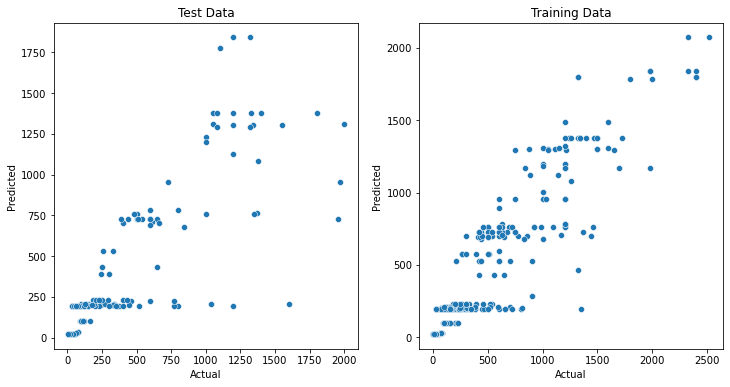

In [88]:
adcv = AdaBoostRegressor(learning_rate=0.05, loss='square', n_estimators=10)
print("Corss Validation Score Mean===>", cross_val_score(adcv, X_train, y_train, cv=5).mean())
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = adcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>Linear Regression was performing better than this model</strong>

<h4>XGBRegressor</h4>

Corss Validation Score Mean===> 0.8116155349107496
________________________________
Training R2 Score : 0.9999927896182991
Training MSE      : 1.5668291223663242
Training MAE      : 0.8430571041253724
Training RMSE     : 1.25173045116204
________________________________
Testing R2 Score : 0.7348135223578364
Testing MSE      : 47936.160704803166
Testing MAE      : 91.13700612723504
Testing RMSE     : 218.94328193576337


Text(0.5, 1.0, 'Training Data')

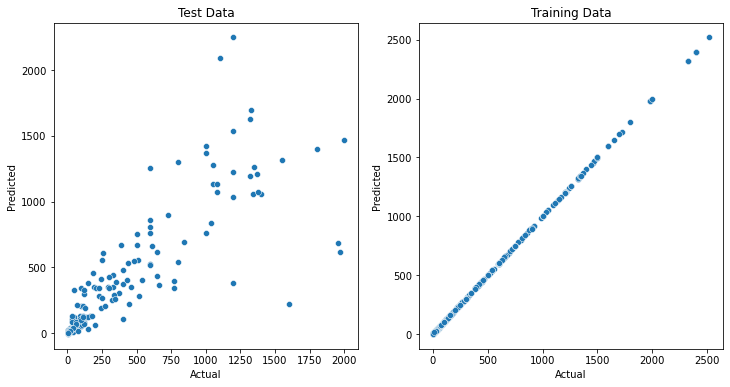

In [89]:
from xgboost import XGBRegressor

xg = XGBRegressor()

print("Corss Validation Score Mean===>", cross_val_score(xg, X_train, y_train, cv=5).mean())
xg.fit(X_train, y_train)

y_pred_train = xg.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xg.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<h4>HyperParameter Tuning</h4>

In [90]:
xgcv = XGBRegressor()

grid_params = {
    'n_estimators':[10,20,50,100,150, 180,200],
    'max_depth':[4,5,6,7],
    'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5],
    'n_jobs':[-1]
}

grid_xg = GridSearchCV(xgcv, param_grid=grid_params, cv=3, n_jobs=-1, verbose=3)
grid_xg.fit(X_train, y_train)

print('Best Score -->', grid_xg.best_score_)
print('Best Params -->', grid_xg.best_params_)

Fitting 3 folds for each of 196 candidates, totalling 588 fits
Best Score --> 0.8180227336255191
Best Params --> {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150, 'n_jobs': -1}


Corss Validation Score Mean===> 0.7923843093608965
________________________________
Training R2 Score : 0.9758974364924351
Training MSE      : 5276.1170706234825
Training MAE      : 37.90252006410132
Training RMSE     : 72.63688505589624
________________________________
Testing R2 Score : 0.8065661328641235
Testing MSE      : 34352.83632251759
Testing MAE      : 93.14371150079381
Testing RMSE     : 185.34518154653387


Text(0.5, 1.0, 'Training Data')

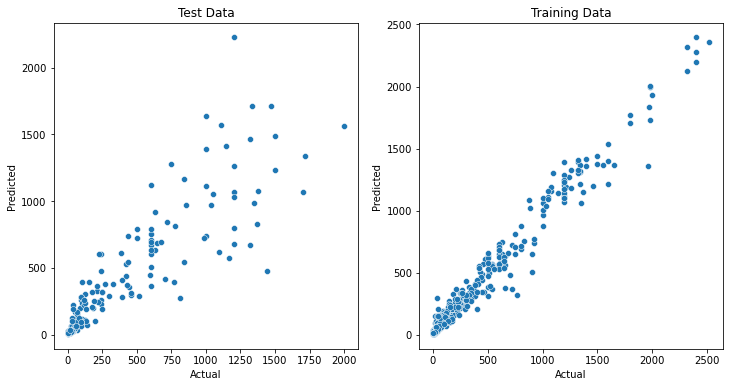

In [94]:
xgcv = XGBRegressor(learning_rate=0.05, max_depth=4, n_estimators=150)
print("Corss Validation Score Mean===>", cross_val_score(xgcv, X_train, y_train, cv=5).mean())
xgcv.fit(X_train, y_train)

y_pred_train = xgcv.predict(X_train)
print("________________________________")
print("Training R2 Score :", r2_score(y_train, y_pred_train))
print("Training MSE      :", mean_squared_error(y_train, y_pred_train))
print("Training MAE      :", mean_absolute_error(y_train, y_pred_train))
print("Training RMSE     :", np.sqrt(mean_squared_error(y_train, y_pred_train)))

y_pred_test = xgcv.predict(X_test)
print("________________________________")
print("Testing R2 Score :", r2_score(y_test, y_pred_test))
print("Testing MSE      :", mean_squared_error(y_test, y_pred_test))
print("Testing MAE      :", mean_absolute_error(y_test, y_pred_test))
print("Testing RMSE     :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_pred_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')
plt.subplot(1,2,2)
sns.scatterplot(y_train,y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Data')

<strong>XGB is the best performing model , as it has least difference between cvscore and cross val score</strong>

<h4>model Saving</h4>

In [95]:
import pickle

pickle.dump(xgcv, open('regression.pickle', 'wb'))

<h3>Model Builiding For classification Problem</h3>

<h4>OverSampling</h4>

In [99]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_cla, y_cla = oversample.fit_resample(X_cla, y_cla)

In [100]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_cla, y_cla, test_size=0.3, random_state=2)
print(X_train.shape)
print(X_test.shape)

(1310, 485)
(562, 485)


<h3>KNeighbors Classifier</h3>

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9152671755725191
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       1.00      0.84      0.91       205
        Coal       0.67      0.97      0.79       111
         Gas       0.85      0.83      0.84       182
       Hydro       0.84      0.97      0.90       136
     Nuclear       1.00      0.91      0.95       176
         Oil       0.97      0.87      0.92       181
       Solar       0.99      1.00      1.00       168
        Wind       1.00      1.00      1.00       151

    accuracy                           0.92      1310
   macro avg       0.92      0.92      0.91      1310
weighted avg       0.93      0.92      0.92      1310


Testing Accuracy : 0.8932384341637011
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       1.00      0.83      0.91        75
        Coal       0.64      0.98      0.78        48
         Gas       0

Text(69.0, 0.5, 'Predicted')

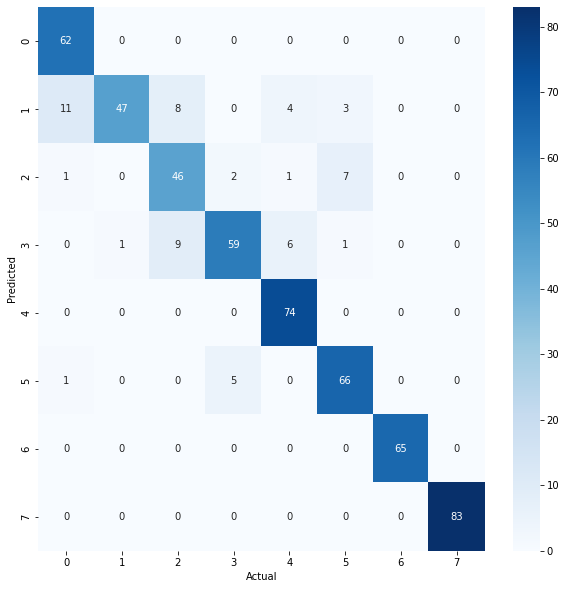

In [105]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>HyperParameter Tuning</h4>

In [106]:
knncv = KNeighborsClassifier()

grid_param = {
    'n_neighbors':[3,5,7,9,11,13,15],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[4,7,9,11,13,15,17,21],
    'p':[1,2,3],
    'n_jobs':[-1]
}

grid_knn = GridSearchCV(knncv, param_grid=grid_param, n_jobs=-1, cv=3, verbose=3)
grid_knn.fit(X_train, y_train)
print('Best Score:', grid_knn.best_score_)
print('Best Params:', grid_knn.best_params_)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits
Best Score: 0.8969516931539059
Best Params: {'algorithm': 'auto', 'leaf_size': 4, 'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [107]:
knncv = KNeighborsClassifier(leaf_size=4, n_neighbors=3, p=1, weights='distance')
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
y_pred_test = knncv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       1.00      1.00      1.00       172
        Coal       1.00      1.00      1.00       161
         Gas       1.00      1.00      1.00       177
       Hydro       1.00      1.00      1.00       158
     Nuclear       1.00      1.00      1.00       160
         Oil       1.00      1.00      1.00       162
       Solar       1.00      1.00      1.00       169
        Wind       1.00      1.00      1.00       151

    accuracy                           1.00      1310
   macro avg       1.00      1.00      1.00      1310
weighted avg       1.00      1.00      1.00      1310


Testing Accuracy : 0.9323843416370107
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       1.00      0.89      0.94        70
        Coal       0.75      1.00      0.86        55
         Gas       0.91      0.80  

Text(69.0, 0.5, 'Predicted')

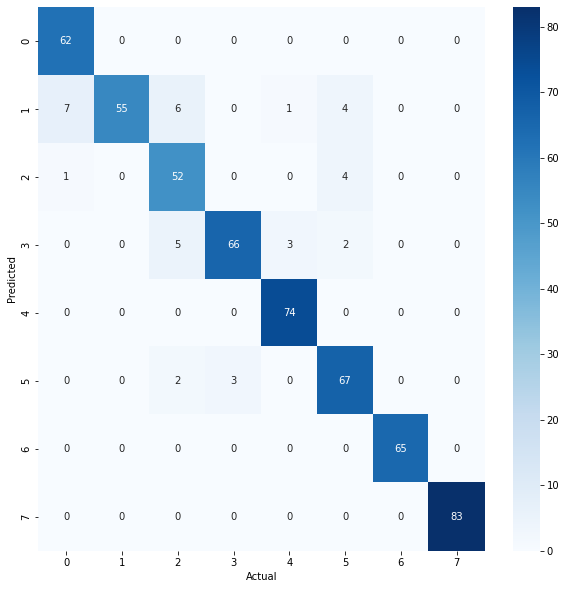

In [108]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>Tuned Model is performing better</strong>

<h4>Logistic Regression</h4>

In [109]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8641221374045801
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.98      0.92      0.95       182
        Coal       0.91      0.92      0.92       158
         Gas       0.58      0.76      0.66       134
       Hydro       0.68      0.72      0.70       148
     Nuclear       0.86      0.88      0.87       157
         Oil       0.93      0.72      0.81       211
       Solar       1.00      1.00      1.00       169
        Wind       1.00      1.00      1.00       151

    accuracy                           0.86      1310
   macro avg       0.87      0.87      0.86      1310
weighted avg       0.88      0.86      0.87      1310


Testing Accuracy : 0.8416370106761566
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.98      0.88      0.93        69
        Coal       0.79      0.95      0.87        61
         Gas       0

Text(69.0, 0.5, 'Predicted')

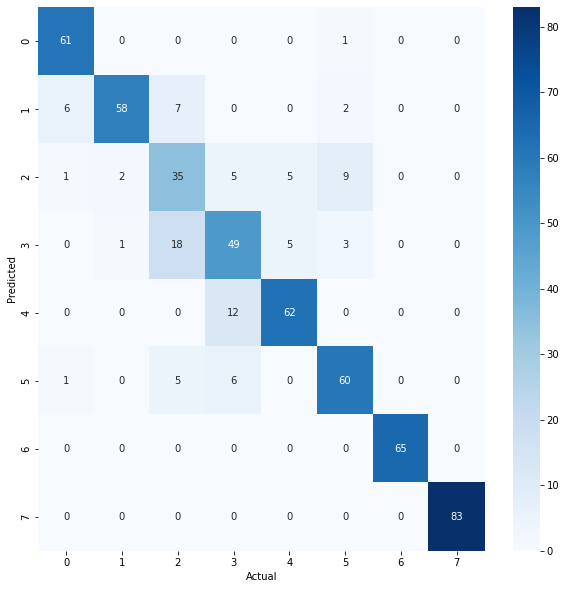

In [110]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [111]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(100, 4000, 200),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)
print('Best Score:', grid_lr.best_score_)
print('Best Params:', grid_lr.best_params_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Best Score: 0.8305236565686253
Best Params: {'dual': False, 'fit_intercept': False, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


In [112]:
lrcv = LogisticRegression(solver='saga', fit_intercept=False)

lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
y_pred_test = lrcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8625954198473282
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.98      0.92      0.95       182
        Coal       0.91      0.92      0.92       159
         Gas       0.56      0.75      0.64       132
       Hydro       0.68      0.72      0.70       149
     Nuclear       0.86      0.88      0.87       157
         Oil       0.93      0.72      0.81       211
       Solar       1.00      1.00      1.00       169
        Wind       1.00      1.00      1.00       151

    accuracy                           0.86      1310
   macro avg       0.87      0.86      0.86      1310
weighted avg       0.88      0.86      0.87      1310


Testing Accuracy : 0.8416370106761566
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.98      0.88      0.93        69
        Coal       0.79      0.95      0.87        61
         Gas       0

Text(69.0, 0.5, 'Predicted')

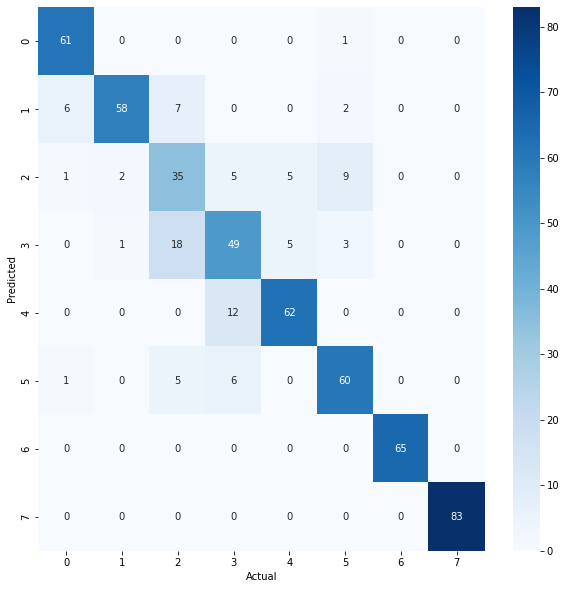

In [113]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>Knn was performing better than this model</strong>

<h3>DecisionTree Classifier</h3>

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       1.00      1.00      1.00       172
        Coal       1.00      1.00      1.00       161
         Gas       1.00      1.00      1.00       177
       Hydro       1.00      1.00      1.00       158
     Nuclear       1.00      1.00      1.00       160
         Oil       1.00      1.00      1.00       162
       Solar       1.00      1.00      1.00       169
        Wind       1.00      1.00      1.00       151

    accuracy                           1.00      1310
   macro avg       1.00      1.00      1.00      1310
weighted avg       1.00      1.00      1.00      1310


Testing Accuracy : 0.9270462633451957
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.98      0.91      0.95        67
        Coal       0.82      0.94      0.88        64
         Gas       0.81      0.77  

Text(69.0, 0.5, 'Predicted')

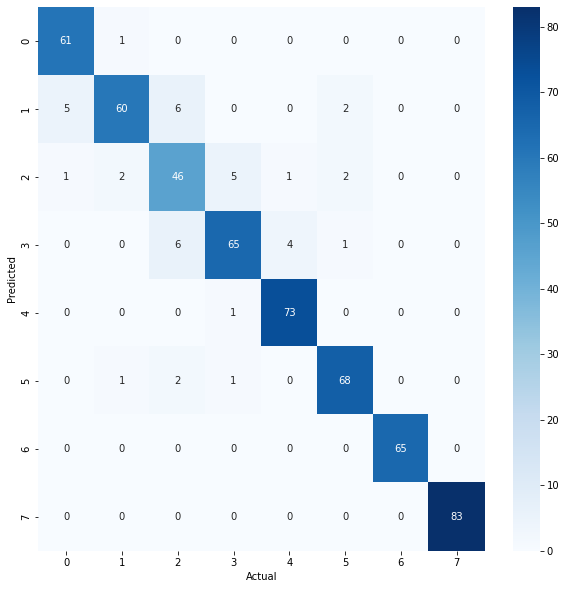

In [115]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>HyperParameter Tuning</h4>

In [120]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[None,13,14,15,16],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,4,5, 6,7],
    'max_leaf_nodes':[20,25,30,35, None]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1, verbose=True)
grid_dt.fit(X_train, y_train)

print('Best Score:', grid_dt.best_score_)
print('Best Params:', grid_dt.best_params_)

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits
Best Score: 0.9007533292745226
Best Params: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [121]:
dtcv = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2, splitter='best')

dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
y_pred_test = dtcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9587786259541985
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.98      0.95      0.96       177
        Coal       0.94      0.90      0.92       169
         Gas       0.86      0.93      0.89       165
       Hydro       0.96      0.96      0.96       158
     Nuclear       0.98      0.99      0.98       159
         Oil       0.96      0.96      0.96       162
       Solar       0.99      1.00      1.00       168
        Wind       1.00      0.99      1.00       152

    accuracy                           0.96      1310
   macro avg       0.96      0.96      0.96      1310
weighted avg       0.96      0.96      0.96      1310


Testing Accuracy : 0.9092526690391459
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.94      0.91      0.92        64
        Coal       0.88      0.91      0.90        70
         Gas       0

Text(69.0, 0.5, 'Predicted')

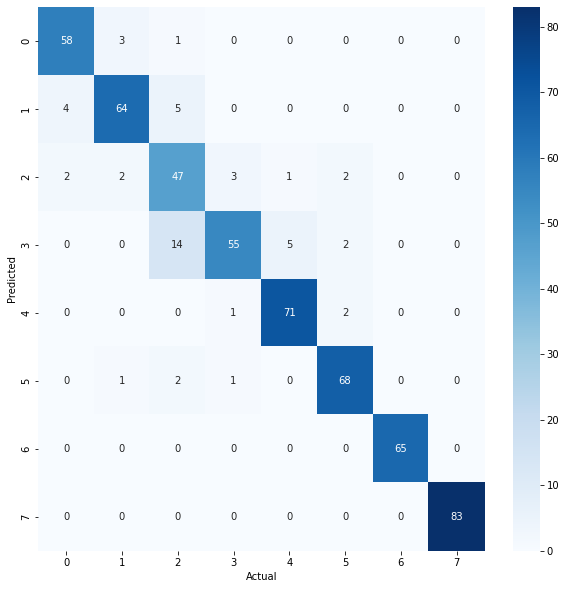

In [122]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>Knn was perfoprming better than this model<strong>

<h3>RandomForest Classifier</h3>

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  1.0
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       1.00      1.00      1.00       172
        Coal       1.00      1.00      1.00       161
         Gas       1.00      1.00      1.00       177
       Hydro       1.00      1.00      1.00       158
     Nuclear       1.00      1.00      1.00       160
         Oil       1.00      1.00      1.00       162
       Solar       1.00      1.00      1.00       169
        Wind       1.00      1.00      1.00       151

    accuracy                           1.00      1310
   macro avg       1.00      1.00      1.00      1310
weighted avg       1.00      1.00      1.00      1310


Testing Accuracy : 0.9377224199288257
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.98      0.92      0.95        66
        Coal       0.85      1.00      0.92        62
         Gas       0.86      0.79  

Text(69.0, 0.5, 'Predicted')

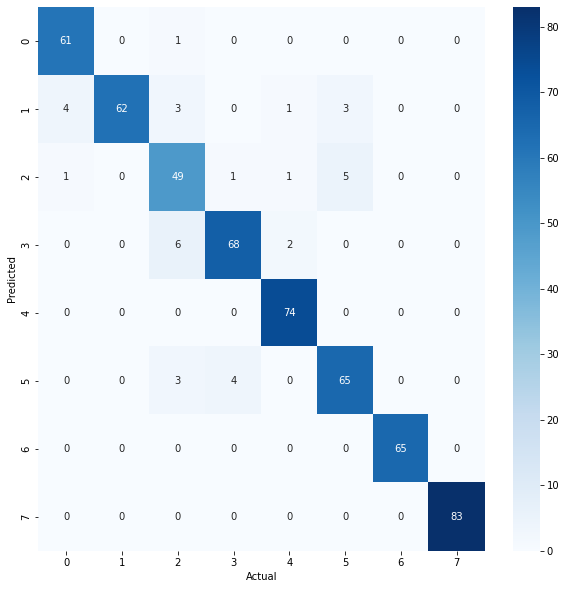

In [124]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>HyperParameter Tuning</h4>

In [125]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[100,200,250],
    'criterion':['gini', 'entropy'],
    'max_depth':[None,9,10,11],
    'min_samples_split':[3,4,5],
    'min_samples_leaf':[3,4,5],
    'max_leaf_nodes':[None,50,55,60],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score:', grid_rf.best_score_)
print('Best Params:', grid_rf.best_params_)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best Score: 0.8419967949390829
Best Params: {'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100, 'n_jobs': -1}


In [126]:
rfcv = RandomForestClassifier(criterion='entropy', max_depth=None, min_samples_leaf=3, min_samples_split=5, n_estimators=100)

rfcv.fit(X_train, y_train)

y_pred_train = rfcv.predict(X_train)
y_pred_test = rfcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8725190839694656
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       1.00      0.54      0.70       320
        Coal       0.73      0.98      0.84       119
         Gas       0.79      0.94      0.86       149
       Hydro       0.91      1.00      0.95       144
     Nuclear       0.99      0.97      0.98       164
         Oil       0.56      0.97      0.71        94
       Solar       1.00      1.00      1.00       169
        Wind       1.00      1.00      1.00       151

    accuracy                           0.87      1310
   macro avg       0.87      0.92      0.88      1310
weighted avg       0.91      0.87      0.87      1310


Testing Accuracy : 0.8469750889679716
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.98      0.55      0.71       111
        Coal       0.78      0.98      0.87        58
         Gas       0

<strong>RandomForest without hyperparameter tuning was performing better</strong>

<h3>AdaBoost Classifier</h3>

In [127]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()

ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
y_pred_test = ad.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.3786259541984733
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00         0
        Coal       0.00      0.00      0.00         0
         Gas       1.00      0.18      0.30       990
       Hydro       0.00      0.00      0.00         0
     Nuclear       0.00      0.00      0.00         0
         Oil       0.00      0.00      0.00         0
       Solar       0.99      1.00      1.00       168
        Wind       1.00      0.99      1.00       152

    accuracy                           0.38      1310
   macro avg       0.37      0.27      0.29      1310
weighted avg       1.00      0.38      0.47      1310


Testing Accuracy : 0.36476868327402134
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00         0
        Coal       0.00      0.00      0.00         0
         Gas       

Text(69.0, 0.5, 'Predicted')

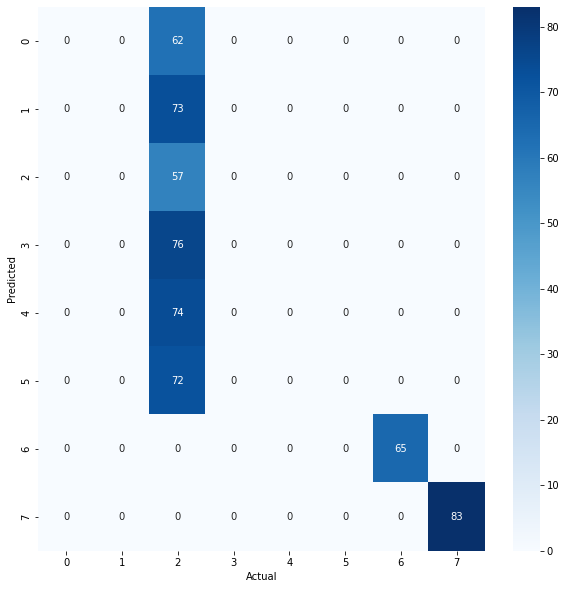

In [128]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<h4>hyperParameter Tuning</h4>

In [129]:
adcv = AdaBoostClassifier()

grid_params ={
    'n_estimators':[30,50,70,90,110,130,150],
    'learning_rate':[0.01, 0.05, 0.1,0.3,0.5,0.7, 0.9,1,1.4,1.5]
}

grid_ad = GridSearchCV(adcv, param_grid=grid_params, cv=3, verbose=1)

grid_ad.fit(X_train, y_train)

print('Best Score:', grid_ad.best_score_)
print('Best Params:', grid_ad.best_params_)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
Best Score: 0.6694431031707708
Best Params: {'learning_rate': 0.7, 'n_estimators': 130}


In [130]:
adcv = AdaBoostClassifier(n_estimators=130, learning_rate=0.7)
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
y_pred_test = adcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.6320610687022901
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.94      0.90      0.92       178
        Coal       0.19      0.53      0.28        59
         Gas       0.58      0.33      0.42       313
       Hydro       0.00      0.00      0.00         0
     Nuclear       0.85      0.66      0.74       206
         Oil       0.49      0.34      0.40       234
       Solar       0.99      1.00      1.00       168
        Wind       1.00      0.99      1.00       152

    accuracy                           0.63      1310
   macro avg       0.63      0.59      0.59      1310
weighted avg       0.74      0.63      0.67      1310


Testing Accuracy : 0.6156583629893239
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

     Biomass       0.97      0.91      0.94        66
        Coal       0.21      0.71      0.32        21
         Gas       0

Text(69.0, 0.5, 'Predicted')

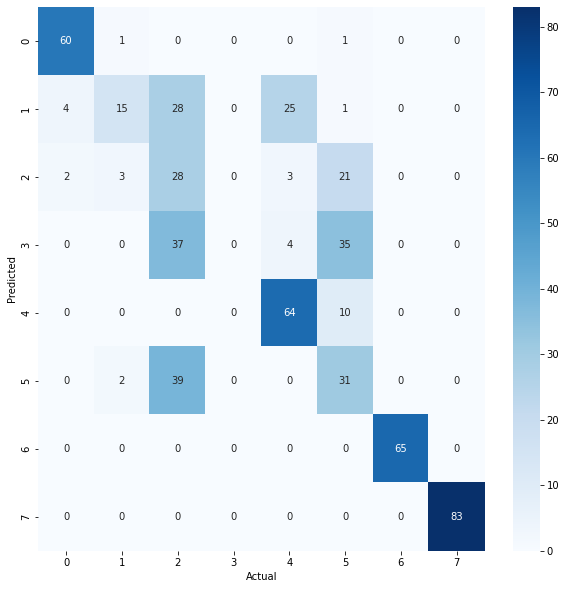

In [131]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<strong>Random Forst was cleary performing better than this model</strong>

<h4>model Saving</h4>

In [132]:
pickle.dump(rf, open('classification.pickle', 'wb'))